#Business Case :Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They want to understand the factors on which the pricing of cars depends.Essentially, the company wants to know:1.Which variables are significant in predicting the price of a car. 2.How well those variables describe the price of a car.

# Load the datafile CarPrice_Assignment.csv

In [245]:
# Import the functions
import pandas as pd
import numpy as np
# read the CSV file
car = pd.read_csv('CarPrice_Assignment.csv')
print(car.shape)


(205, 26)


# Data Cleaning & Prepartion

In [246]:
# Check for duplicate rows and null values in the columns.
car.drop_duplicates()
car.isnull().sum()



car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [247]:
#There are no duplicate rows or missing values in columns
print(car.shape)

(205, 26)


In [248]:
# Create a new column 'carcompany' by splitting the CarName field and taking the the first word as the name of 'car company'
car['carcompany'] = car['CarName'].str.split(' ').str[0]
# Drop the column CarName as it is not needed
car.drop(['CarName'], axis = 1, inplace = True)
# Drop the column 'car_ID as it has no significance on the price value.its just Unique id of each row entry
car.drop(['car_ID'], axis = 1, inplace = True)
# Fix some of the misspellings in the 'carcompany' field.Names of cars makers are spelt differently
car['carcompany'] = car['carcompany'].str.replace('vw','volkswagen')
car['carcompany'] = car['carcompany'].str.replace('vokswagen','volkswagen')
car['carcompany'] = car['carcompany'].str.replace('toyouta','toyota')
car['carcompany'] = car['carcompany'].str.replace('maxda','mazda')
car['carcompany'] = car['carcompany'].str.replace('porcshce','porsche')
car['carcompany'] = car['carcompany'].str.replace('Nissan','nissan')
print(car.shape)

(205, 25)


#The dataframe car has 205 entries and 25 columns

In [249]:
# Mapping Variables having 2 levels to 1 and 0.- fueltype,aspiration,doornumber,enginelocation
car['fueltype'] = car['fueltype'].map({'gas': 1, 'diesel': 0})
car['aspiration'] = car['aspiration'].map({'std': 1, 'turbo': 0})
car['doornumber'] = car['doornumber'].map({'two': 1, 'four': 0})
car['enginelocation'] = car['enginelocation'].map({'front': 1, 'rear': 0})


In [250]:
# Create dummy variables for independent variables having more than 2 levels -
# carcompany, fuelsystem,cylindernumber,enginetype,carbody,drivewheel
car_dummy = car[['carcompany', 'fuelsystem','cylindernumber','enginetype','carbody','drivewheel']]
dummy = pd.get_dummies(car_dummy, prefix=['carcompany_', 'fuelsystem_','cylindernumber_','enginetype_','carbody_','drivewheel_'], columns=['carcompany', 'fuelsystem','cylindernumber','enginetype','carbody','drivewheel'])
dummy.head(5)

carcompany__alfa-romero  carcompany__audi  carcompany__bmw  \
0                        1                 0                0   
1                        1                 0                0   
2                        1                 0                0   
3                        0                 1                0   
4                        0                 1                0   

   carcompany__buick  carcompany__chevrolet  carcompany__dodge  \
0                  0                      0                  0   
1                  0                      0                  0   
2                  0                      0                  0   
3                  0                      0                  0   
4                  0                      0                  0   

   carcompany__honda  carcompany__isuzu  carcompany__jaguar  \
0                  0                  0                   0   
1                  0                  0                   0   
2                  0                  0                   0   
3                  0                  0                   0   
4                  0                  0                   0   

   carcompany__mazda       ...         enginetype__ohcv  enginetype__rotor  \
0                  0       ...                        0                  0   
1                  0       ...                        0                  0   
2                  0       ...                        1                  0   
3                  0       ...                        0                  0   
4                  0       ...                        0                  0   

   carbody__convertible  carbody__hardtop  carbody__hatchback  carbody__sedan  \
0                     1                 0                   0               0   
1                     1                 0                   0               0   
2                     0                 0                   1               0   
3                     0                 0                   0               1   
4                     0                 0                   0               1   

   carbody__wagon  drivewheel__4wd  drivewheel__fwd  drivewheel__rwd  
0               0                0                0                1  
1               0                0                0                1  
2               0                0                0                1  
3               0                0                1                0  
4               0                1                0                0  

[5 rows x 52 columns]

In [251]:
# Concatenate the dummy variables to the car dataframe
car = pd.concat([car,dummy],axis=1)
# drop the columns from where dummy variables were derived
car.drop(['drivewheel'],axis=1,inplace=True)
car.drop(['carbody'],axis=1,inplace=True)
car.drop(['enginetype'],axis=1,inplace=True)
car.drop(['cylindernumber'],axis=1,inplace=True)
car.drop(['fuelsystem'],axis=1,inplace=True)
car.drop(['carcompany'],axis=1,inplace=True)
car.head()


symboling  fueltype  aspiration  doornumber  enginelocation  wheelbase  \
0          3         1           1           1               1       88.6   
1          3         1           1           1               1       88.6   
2          1         1           1           1               1       94.5   
3          2         1           1           0               1       99.8   
4          2         1           1           0               1       99.4   

   carlength  carwidth  carheight  curbweight       ...         \
0      168.8      64.1       48.8        2548       ...          
1      168.8      64.1       48.8        2548       ...          
2      171.2      65.5       52.4        2823       ...          
3      176.6      66.2       54.3        2337       ...          
4      176.6      66.4       54.3        2824       ...          

   enginetype__ohcv  enginetype__rotor  carbody__convertible  \
0                 0                  0                     1   
1                 0                  0                     1   
2                 1                  0                     0   
3                 0                  0                     0   
4                 0                  0                     0   

   carbody__hardtop  carbody__hatchback  carbody__sedan  carbody__wagon  \
0                 0                   0               0               0   
1                 0                   0               0               0   
2                 0                   1               0               0   
3                 0                   0               1               0   
4                 0                   0               1               0   

   drivewheel__4wd  drivewheel__fwd  drivewheel__rwd  
0                0                0                1  
1                0                0                1  
2                0                0                1  
3                0                1                0  
4                1                0                0  

[5 rows x 71 columns]

In [252]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 71 columns):
symboling                  205 non-null int64
fueltype                   205 non-null int64
aspiration                 205 non-null int64
doornumber                 205 non-null int64
enginelocation             205 non-null int64
wheelbase                  205 non-null float64
carlength                  205 non-null float64
carwidth                   205 non-null float64
carheight                  205 non-null float64
curbweight                 205 non-null int64
enginesize                 205 non-null int64
boreratio                  205 non-null float64
stroke                     205 non-null float64
compressionratio           205 non-null float64
horsepower                 205 non-null int64
peakrpm                    205 non-null int64
citympg                    205 non-null int64
highwaympg                 205 non-null int64
price                      205 non-null float64
carco

# Rescaling the variables by Normalization

In [253]:
#normalisation function 
def normalize (x): 
    return ( (x-np.mean(x))/ (max(x) - min(x)))
# apply the function to all columns 
car = car.apply(normalize)
car.head()

symboling  fueltype  aspiration  doornumber  enginelocation  wheelbase  \
0   0.433171  0.097561    0.180488    0.560976        0.014634  -0.296110   
1   0.433171  0.097561    0.180488    0.560976        0.014634  -0.296110   
2   0.033171  0.097561    0.180488    0.560976        0.014634  -0.124099   
3   0.233171  0.097561    0.180488   -0.439024        0.014634   0.030420   
4   0.233171  0.097561    0.180488   -0.439024        0.014634   0.018758   

   carlength  carwidth  carheight  curbweight       ...         \
0  -0.078347 -0.150650  -0.410407   -0.002935       ...          
1  -0.078347 -0.150650  -0.410407   -0.002935       ...          
2  -0.042526 -0.033984  -0.110407    0.103737       ...          
3   0.038071  0.024350   0.047927   -0.084781       ...          
4   0.038071  0.041016   0.047927    0.104125       ...          

   enginetype__ohcv  enginetype__rotor  carbody__convertible  \
0         -0.063415          -0.019512              0.970732   
1         -0.063415          -0.019512              0.970732   
2          0.936585          -0.019512             -0.029268   
3         -0.063415          -0.019512             -0.029268   
4         -0.063415          -0.019512             -0.029268   

   carbody__hardtop  carbody__hatchback  carbody__sedan  carbody__wagon  \
0         -0.039024           -0.341463       -0.468293       -0.121951   
1         -0.039024           -0.341463       -0.468293       -0.121951   
2         -0.039024            0.658537       -0.468293       -0.121951   
3         -0.039024           -0.341463        0.531707       -0.121951   
4         -0.039024           -0.341463        0.531707       -0.121951   

   drivewheel__4wd  drivewheel__fwd  drivewheel__rwd  
0        -0.043902        -0.585366         0.629268  
1        -0.043902        -0.585366         0.629268  
2        -0.043902        -0.585366         0.629268  
3        -0.043902         0.414634        -0.370732  
4         0.956098        -0.585366        -0.370732  

[5 rows x 71 columns]

# Splitting Data into Training and Testing Sets

In [254]:
car.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'carcompany__alfa-romero',
       'carcompany__audi', 'carcompany__bmw', 'carcompany__buick',
       'carcompany__chevrolet', 'carcompany__dodge', 'carcompany__honda',
       'carcompany__isuzu', 'carcompany__jaguar', 'carcompany__mazda',
       'carcompany__mercury', 'carcompany__mitsubishi', 'carcompany__nissan',
       'carcompany__peugeot', 'carcompany__plymouth', 'carcompany__porsche',
       'carcompany__renault', 'carcompany__saab', 'carcompany__subaru',
       'carcompany__toyota', 'carcompany__volkswagen', 'carcompany__volvo',
       'fuelsystem__1bbl', 'fuelsystem__2bbl', 'fuelsystem__4bbl',
       'fuelsystem__idi', 'fuelsystem__mfi', 'fuelsystem__mpfi',
       'fuelsystem__spdi', 'fuelsystem__spfi',

In [255]:
# Putting feature variable to X
X = car[['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg','carcompany__alfa-romero',
       'carcompany__audi', 'carcompany__bmw', 'carcompany__buick',
       'carcompany__chevrolet', 'carcompany__dodge', 'carcompany__honda',
       'carcompany__isuzu', 'carcompany__jaguar', 'carcompany__mazda',
       'carcompany__mercury', 'carcompany__mitsubishi', 'carcompany__nissan',
       'carcompany__peugeot', 'carcompany__plymouth', 'carcompany__porsche',
       'carcompany__renault', 'carcompany__saab', 'carcompany__subaru',
       'carcompany__toyota', 'carcompany__volkswagen', 'carcompany__volvo',
       'fuelsystem__1bbl', 'fuelsystem__2bbl', 'fuelsystem__4bbl',
       'fuelsystem__idi', 'fuelsystem__mfi', 'fuelsystem__mpfi',
       'fuelsystem__spdi', 'fuelsystem__spfi', 'cylindernumber__eight',
       'cylindernumber__five', 'cylindernumber__four', 'cylindernumber__six',
       'cylindernumber__three', 'cylindernumber__twelve',
       'cylindernumber__two', 'enginetype__dohc', 'enginetype__dohcv',
       'enginetype__l', 'enginetype__ohc', 'enginetype__ohcf',
       'enginetype__ohcv', 'enginetype__rotor', 'carbody__convertible',
       'carbody__hardtop', 'carbody__hatchback', 'carbody__sedan',
       'carbody__wagon', 'drivewheel__4wd', 'drivewheel__fwd',
       'drivewheel__rwd']]

# Putting response variable to y
y = car['price']

In [256]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [257]:
# Function for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)



# Start building the Linear Model

#We will first begin with condidering all independent variables and then use RFE to eliminate non essentials ones.There will will multiple models to analyze subsequently.

# Model 1 - Consider all independent variables to see how the model summary looks initially.Though this is not ideal

In [258]:
import statsmodels.api as sm          # Importing statsmodels
X_train = sm.add_constant(X_train)    # Adding a constant column to our dataframe
# create a first fitted model
lm_1 = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our first linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     57.59
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           1.40e-49
Time:                        23:23:53   Log-Likelihood:                 295.32
No. Observations:                 143   AIC:                            -474.6
Df Residuals:                      85   BIC:                            -302.8
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
symboling                 

In [259]:
# Calculating Vif value
vif_cal(input_data=car, dependent_col="price")

C:\Users\Z001MC7\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Var         Vif
35         carcompany__saab         inf
44          fuelsystem__mfi         inf
50     cylindernumber__four         inf
49     cylindernumber__five         inf
48    cylindernumber__eight         inf
47         fuelsystem__spfi         inf
46         fuelsystem__spdi         inf
45         fuelsystem__mpfi         inf
43          fuelsystem__idi         inf
52    cylindernumber__three         inf
42         fuelsystem__4bbl         inf
41         fuelsystem__2bbl         inf
40         fuelsystem__1bbl         inf
39        carcompany__volvo         inf
38   carcompany__volkswagen         inf
37       carcompany__toyota         inf
51      cylindernumber__six         inf
53   cylindernumber__twelve         inf
1                  fueltype         inf
62     carbody__convertible         inf
68          drivewheel__fwd         inf
67          drivewheel__4wd         inf
66           carbody__wagon         inf
65           carbody__sedan         inf
64       carbody__hatchback         inf
63         carbody__hardtop         inf
61        enginetype__rotor         inf
54      cylindernumber__two         inf
60         enginetype__ohcv         inf
59         enginetype__ohcf         inf
..                      ...         ...
18  carcompany__alfa-romero         inf
19         carcompany__audi         inf
20          carcompany__bmw         inf
21        carcompany__buick         inf
22    carcompany__chevrolet         inf
23        carcompany__dodge         inf
25        carcompany__isuzu         inf
26       carcompany__jaguar         inf
27        carcompany__mazda         inf
28      carcompany__mercury         inf
29   carcompany__mitsubishi         inf
30       carcompany__nissan         inf
31      carcompany__peugeot         inf
32     carcompany__plymouth         inf
13         compressionratio  251.190000
10               enginesize   74.900000
14               horsepower   59.720000
16                  citympg   51.180000
9                curbweight   51.040000
17               highwaympg   41.440000
6                 carlength   24.850000
5                 wheelbase   19.770000
11                boreratio   16.520000
7                  carwidth   15.340000
8                 carheight    7.610000
2                aspiration    6.640000
0                 symboling    6.560000
12                   stroke    6.440000
15                  peakrpm    6.320000
3                doornumber    3.850000

[70 rows x 2 columns]

# Model 1 shows strong multicollinearity problems.98% of the variables are above the acceptable values of VIF and p-value.This is not a viable Model

# Our goal is to identify top 4-5 variables that decide car price.Since our number of variables are large in number we will use RFE to identify top 30 variables and then work down variable by variable to arrive at our goal

# Model 2 - RFE with 30 independent variables

In [260]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable equal to 9
lm = LinearRegression()
rfe = RFE(lm, 30)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

[False  True False False  True  True  True  True False  True  True  True
  True  True False False False False False False  True False False False
 False False False False False False False  True False  True False  True
  True False False  True  True  True  True  True False  True  True False
  True False False  True  True  True  True False False False False  True
 False  True  True False False False False False False False]
[40  1 38 41  1  1  1  1 34  1  1  1  1  1 36 35 39 37 11 12  1 20 28 15
 17  2 13 18 31  4  8  1 14  1 27  1  1 16 29  1  1  1  1  1 32  1  1 33
  1  7  3  1  1  1  1 10 19 24  5  1  6  1  1 30 21 26 25 22 23  9]


In [261]:
elim = X_train.columns[~rfe.support_]
elim

Index(['symboling', 'aspiration', 'doornumber', 'carheight', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'carcompany__alfa-romero',
       'carcompany__audi', 'carcompany__buick', 'carcompany__chevrolet',
       'carcompany__dodge', 'carcompany__honda', 'carcompany__isuzu',
       'carcompany__jaguar', 'carcompany__mazda', 'carcompany__mercury',
       'carcompany__mitsubishi', 'carcompany__nissan', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__toyota', 'carcompany__volkswagen',
       'fuelsystem__mfi', 'fuelsystem__spfi', 'cylindernumber__five',
       'cylindernumber__four', 'enginetype__dohc', 'enginetype__dohcv',
       'enginetype__l', 'enginetype__ohc', 'enginetype__ohcv',
       'carbody__hardtop', 'carbody__hatchback', 'carbody__sedan',
       'carbody__wagon', 'drivewheel__4wd', 'drivewheel__fwd',
       'drivewheel__rwd'],
      dtype='object')

In [262]:
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm_2 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     88.93
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           1.48e-64
Time:                        23:24:09   Log-Likelihood:                 249.69
No. Observations:                 143   AIC:                            -445.4
Df Residuals:                     116   BIC:                            -365.4
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [263]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'aspiration', 'doornumber', 'carheight', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'carcompany__alfa-romero',
       'carcompany__audi', 'carcompany__buick', 'carcompany__chevrolet',
       'carcompany__dodge', 'carcompany__honda', 'carcompany__isuzu',
       'carcompany__jaguar', 'carcompany__mazda', 'carcompany__mercury',
       'carcompany__mitsubishi', 'carcompany__nissan', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__toyota', 'carcompany__volkswagen',
       'fuelsystem__mfi', 'fuelsystem__spfi', 'cylindernumber__five',
       'cylindernumber__four', 'enginetype__dohc', 'enginetype__dohcv',
       'enginetype__l', 'enginetype__ohc', 'enginetype__ohcv',
       'carbody__hardtop', 'carbody__hatchback', 'carbody__sedan',
       'carbody__wagon', 'drivewheel__4wd', 'drivewheel__fwd',
       'drivewheel__rwd'], axis=1), dependent_col="price")

C:\Users\Z001MC7\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Var         Vif
0                 fueltype         inf
28       enginetype__rotor         inf
19         fuelsystem__idi         inf
1           enginelocation         inf
14      carcompany__subaru         inf
27        enginetype__ohcf         inf
26     cylindernumber__two         inf
9         compressionratio  100.830000
20        fuelsystem__mpfi   28.580000
6               enginesize   26.070000
17        fuelsystem__2bbl   25.820000
5               curbweight   18.340000
3                carlength   11.970000
2                wheelbase    8.960000
4                 carwidth    7.040000
16        fuelsystem__1bbl    6.990000
7                boreratio    6.090000
23     cylindernumber__six    5.710000
18        fuelsystem__4bbl    5.650000
21        fuelsystem__spdi    5.600000
12     carcompany__porsche    4.560000
22   cylindernumber__eight    4.260000
25  cylindernumber__twelve    3.840000
8                   stroke    3.300000
11     carcompany__peugeot    2.550000
15       carcompany__volvo    2.000000
10         carcompany__bmw    1.640000
13        carcompany__saab    1.530000
29    carbody__convertible    1.510000
24   cylindernumber__three    1.090000

In [264]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

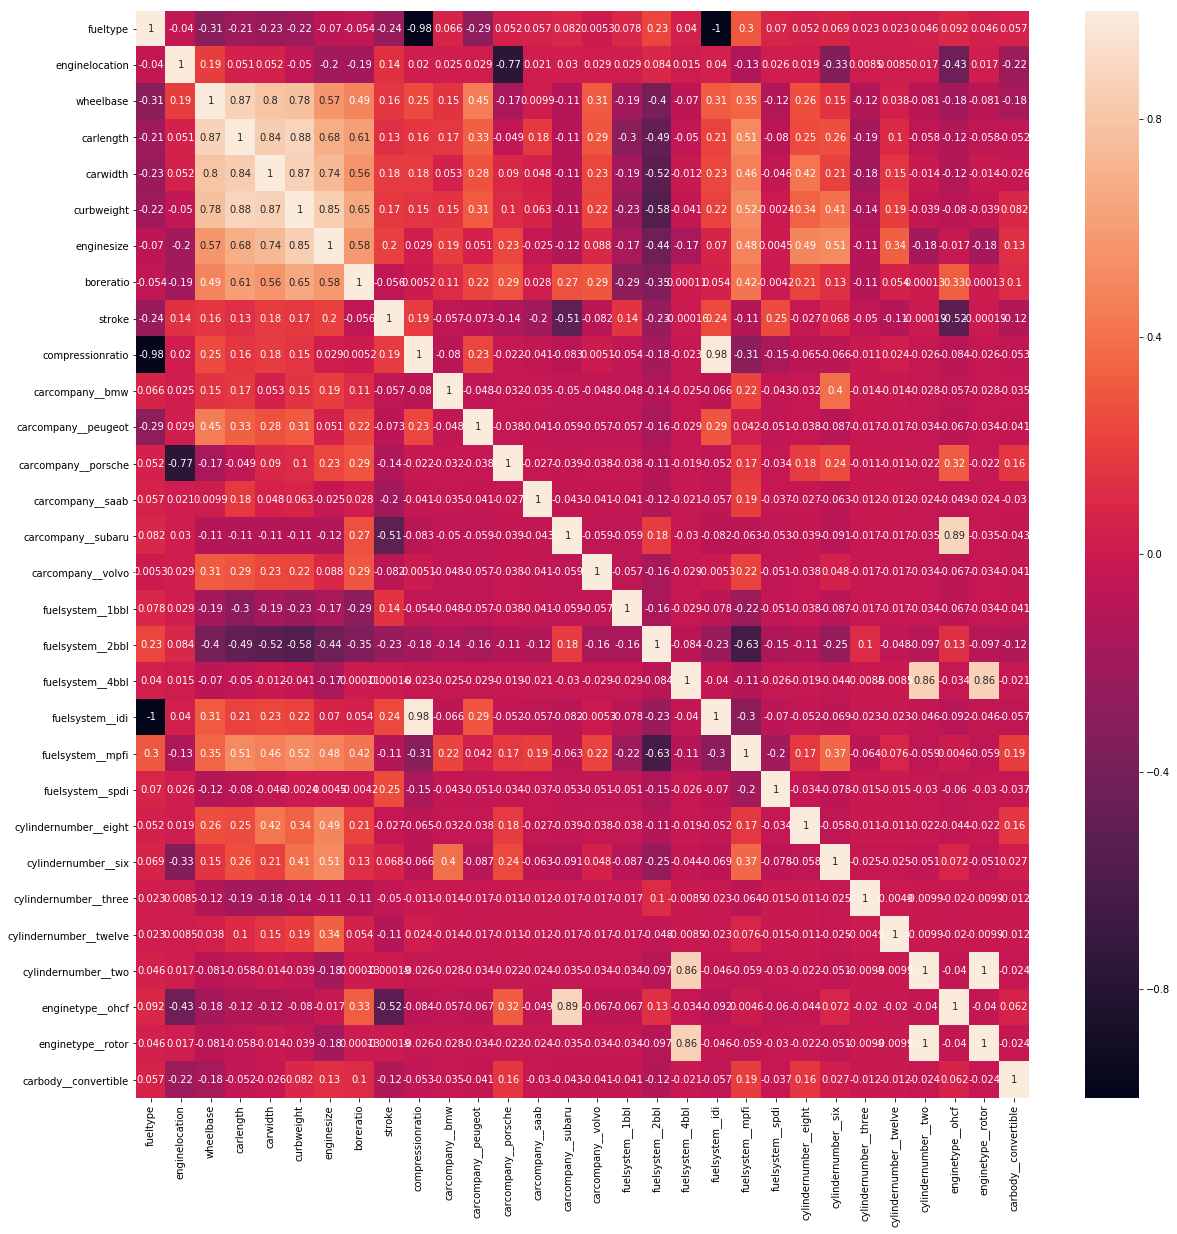

In [265]:
# the correlation matrix for variables in Model 7 
plt.figure(figsize = (20,20))     # Size of the figure
car_corr = car[['fueltype',
'enginelocation',
'wheelbase',
'carlength',
'carwidth',
'curbweight',
'enginesize',
'boreratio',
'stroke',
'compressionratio',
'carcompany__bmw',
'carcompany__peugeot',
'carcompany__porsche',
'carcompany__saab',
'carcompany__subaru',
'carcompany__volvo',
'fuelsystem__1bbl',
'fuelsystem__2bbl',
'fuelsystem__4bbl',
'fuelsystem__idi',
'fuelsystem__mpfi',
'fuelsystem__spdi',
'cylindernumber__eight',
'cylindernumber__six',
'cylindernumber__three',
'cylindernumber__twelve',
'cylindernumber__two',
'enginetype__ohcf',
'enginetype__rotor',
'carbody__convertible']]
sns.heatmap(car_corr.corr(),annot = True)

# We have arrived at 30 independent variables where the model has started to take shape.We will check the correlation between them and work with the variables one by one till we reach the significant 4 to 5 variables that relate best to the price of cars.#Eliminate one by one the ones that have high VIF(>10) or P-Value > 0.01.

# Model 3 - Drop 'fuelsystem__2bbl' p-Value of 0.901 

In [266]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop(['fuelsystem__2bbl'], 1)


In [267]:
lm_3 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_3.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     88.93
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           1.48e-64
Time:                        23:24:22   Log-Likelihood:                 249.69
No. Observations:                 143   AIC:                            -445.4
Df Residuals:                     116   BIC:                            -365.4
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [268]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'aspiration', 'doornumber', 'carheight', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'carcompany__alfa-romero',
       'carcompany__audi', 'carcompany__buick', 'carcompany__chevrolet',
       'carcompany__dodge', 'carcompany__honda', 'carcompany__isuzu',
       'carcompany__jaguar', 'carcompany__mazda', 'carcompany__mercury',
       'carcompany__mitsubishi', 'carcompany__nissan', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__toyota', 'carcompany__volkswagen',
       'fuelsystem__mfi', 'fuelsystem__spfi', 'cylindernumber__five',
       'cylindernumber__four', 'enginetype__dohc', 'enginetype__dohcv',
       'enginetype__l', 'enginetype__ohc', 'enginetype__ohcv',
       'carbody__hardtop', 'carbody__hatchback', 'carbody__sedan',
       'carbody__wagon', 'drivewheel__4wd', 'drivewheel__fwd',
       'drivewheel__rwd','fuelsystem__2bbl'], axis=1), dependent_col="price")

C:\Users\Z001MC7\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Var           Vif
0                 fueltype           inf
18         fuelsystem__idi           inf
14      carcompany__subaru  4.667391e+06
25     cylindernumber__two  2.333212e+06
27       enginetype__rotor  6.481778e+05
26        enginetype__ohcf  2.019217e+05
1           enginelocation  4.293494e+04
9         compressionratio  1.004500e+02
6               enginesize  2.515000e+01
5               curbweight  1.766000e+01
3                carlength  1.177000e+01
2                wheelbase  8.480000e+00
4                 carwidth  7.030000e+00
7                boreratio  6.050000e+00
22     cylindernumber__six  5.670000e+00
12     carcompany__porsche  4.540000e+00
21   cylindernumber__eight  4.180000e+00
17        fuelsystem__4bbl  4.110000e+00
24  cylindernumber__twelve  3.780000e+00
8                   stroke  2.960000e+00
11     carcompany__peugeot  2.550000e+00
19        fuelsystem__mpfi  2.550000e+00
15       carcompany__volvo  1.990000e+00
20        fuelsystem__spdi  1.720000e+00
10         carcompany__bmw  1.630000e+00
13        carcompany__saab  1.490000e+00
16        fuelsystem__1bbl  1.370000e+00
28    carbody__convertible  1.300000e+00
23   cylindernumber__three  1.090000e+00

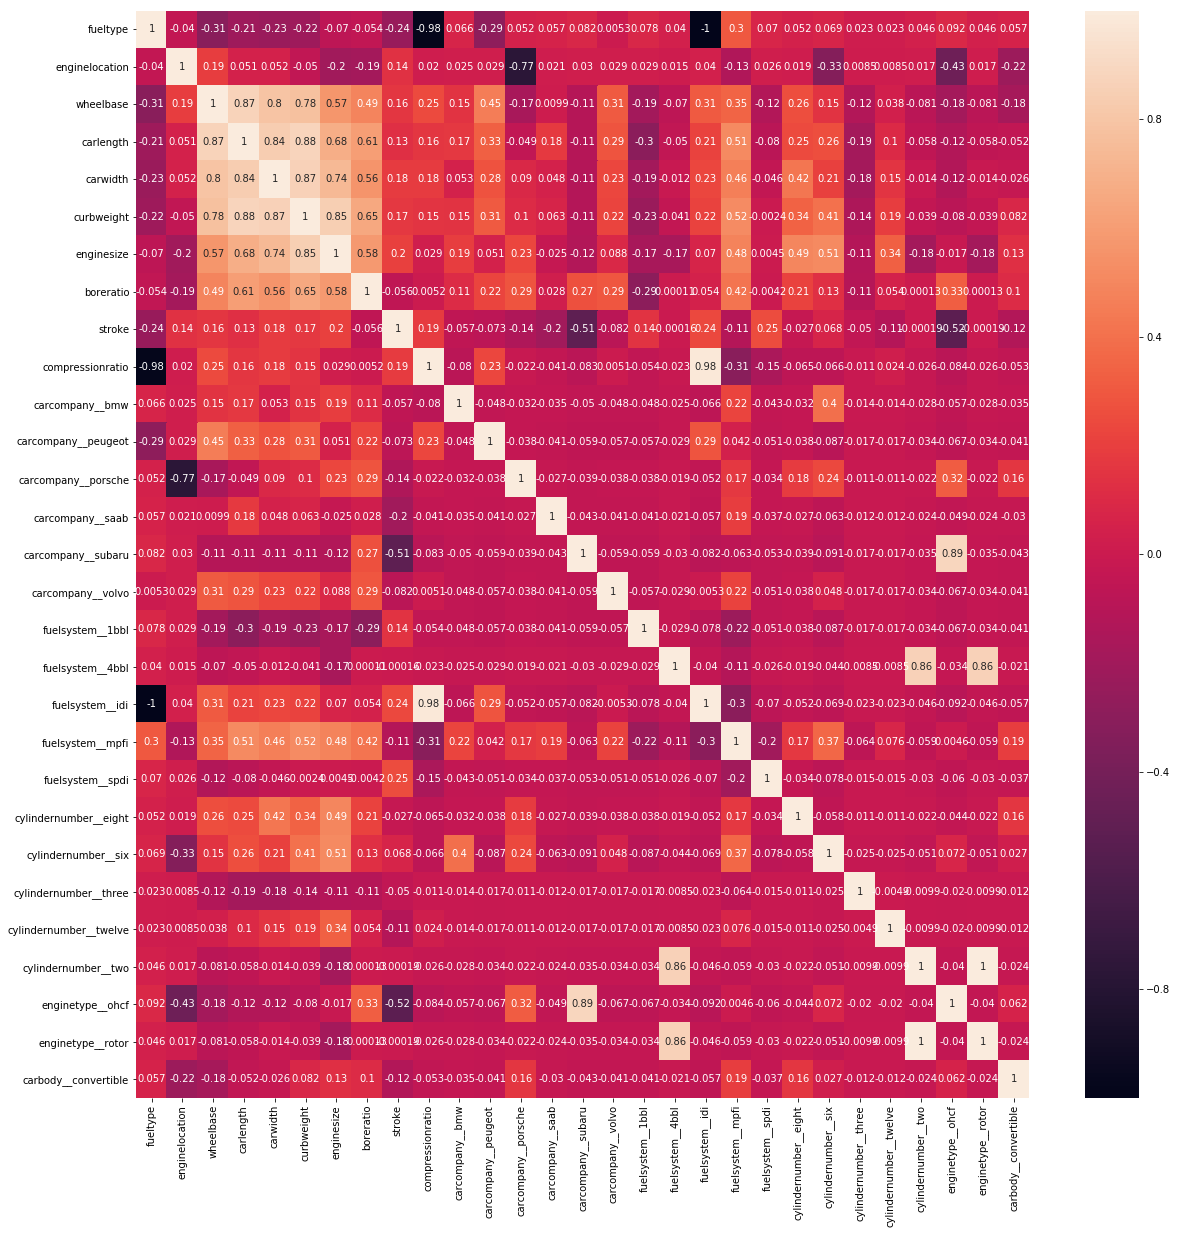

In [269]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,20))     # Size of the figure
car_corr = car[['fueltype',
'enginelocation',
'wheelbase',
'carlength',
'carwidth',
'curbweight',
'enginesize',
'boreratio',
'stroke',
'compressionratio',
'carcompany__bmw',
'carcompany__peugeot',
'carcompany__porsche',
'carcompany__saab',
'carcompany__subaru',
'carcompany__volvo',
'fuelsystem__1bbl',
'fuelsystem__4bbl',
'fuelsystem__idi',
'fuelsystem__mpfi',
'fuelsystem__spdi',
'cylindernumber__eight',
'cylindernumber__six',
'cylindernumber__three',
'cylindernumber__twelve',
'cylindernumber__two',
'enginetype__ohcf',
'enginetype__rotor',
'carbody__convertible']]
sns.heatmap(car_corr.corr(),annot = True)

# Model 4 -Drop 'fuelsystem__1bbl' as it has high p-value of 0.534

In [270]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop(['fuelsystem__1bbl'], 1)

In [271]:
# Create a fitted model
lm_4 = sm.OLS(y_train,X_train_rfe).fit()
#Let's see the linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     92.96
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           1.83e-65
Time:                        23:24:34   Log-Likelihood:                 249.45
No. Observations:                 143   AIC:                            -446.9
Df Residuals:                     117   BIC:                            -369.9
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [272]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'aspiration', 'doornumber', 'carheight', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'carcompany__alfa-romero',
       'carcompany__audi', 'carcompany__buick', 'carcompany__chevrolet',
       'carcompany__dodge', 'carcompany__honda', 'carcompany__isuzu',
       'carcompany__jaguar', 'carcompany__mazda', 'carcompany__mercury',
       'carcompany__mitsubishi', 'carcompany__nissan', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__toyota', 'carcompany__volkswagen',
       'fuelsystem__mfi', 'fuelsystem__spfi', 'cylindernumber__five',
       'cylindernumber__four', 'enginetype__dohc', 'enginetype__dohcv',
       'enginetype__l', 'enginetype__ohc', 'enginetype__ohcv',
       'carbody__hardtop', 'carbody__hatchback', 'carbody__sedan',
       'carbody__wagon', 'drivewheel__4wd', 'drivewheel__fwd',
       'drivewheel__rwd','fuelsystem__2bbl','fuelsystem__1bbl'], axis=1), dependent_col="price")

C:\Users\Z001MC7\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Var           Vif
0                 fueltype           inf
17         fuelsystem__idi           inf
24     cylindernumber__two  3.355936e+07
26       enginetype__rotor  1.632892e+06
25        enginetype__ohcf  8.076869e+05
14      carcompany__subaru  1.296498e+05
1           enginelocation  4.293494e+04
9         compressionratio  9.780000e+01
6               enginesize  2.537000e+01
5               curbweight  1.737000e+01
3                carlength  1.102000e+01
2                wheelbase  8.590000e+00
4                 carwidth  6.980000e+00
7                boreratio  5.800000e+00
21     cylindernumber__six  5.560000e+00
12     carcompany__porsche  4.540000e+00
16        fuelsystem__4bbl  4.110000e+00
20   cylindernumber__eight  4.080000e+00
23  cylindernumber__twelve  3.620000e+00
8                   stroke  2.850000e+00
18        fuelsystem__mpfi  2.510000e+00
11     carcompany__peugeot  2.460000e+00
15       carcompany__volvo  1.930000e+00
19        fuelsystem__spdi  1.700000e+00
10         carcompany__bmw  1.580000e+00
13        carcompany__saab  1.460000e+00
27    carbody__convertible  1.290000e+00
22   cylindernumber__three  1.080000e+00

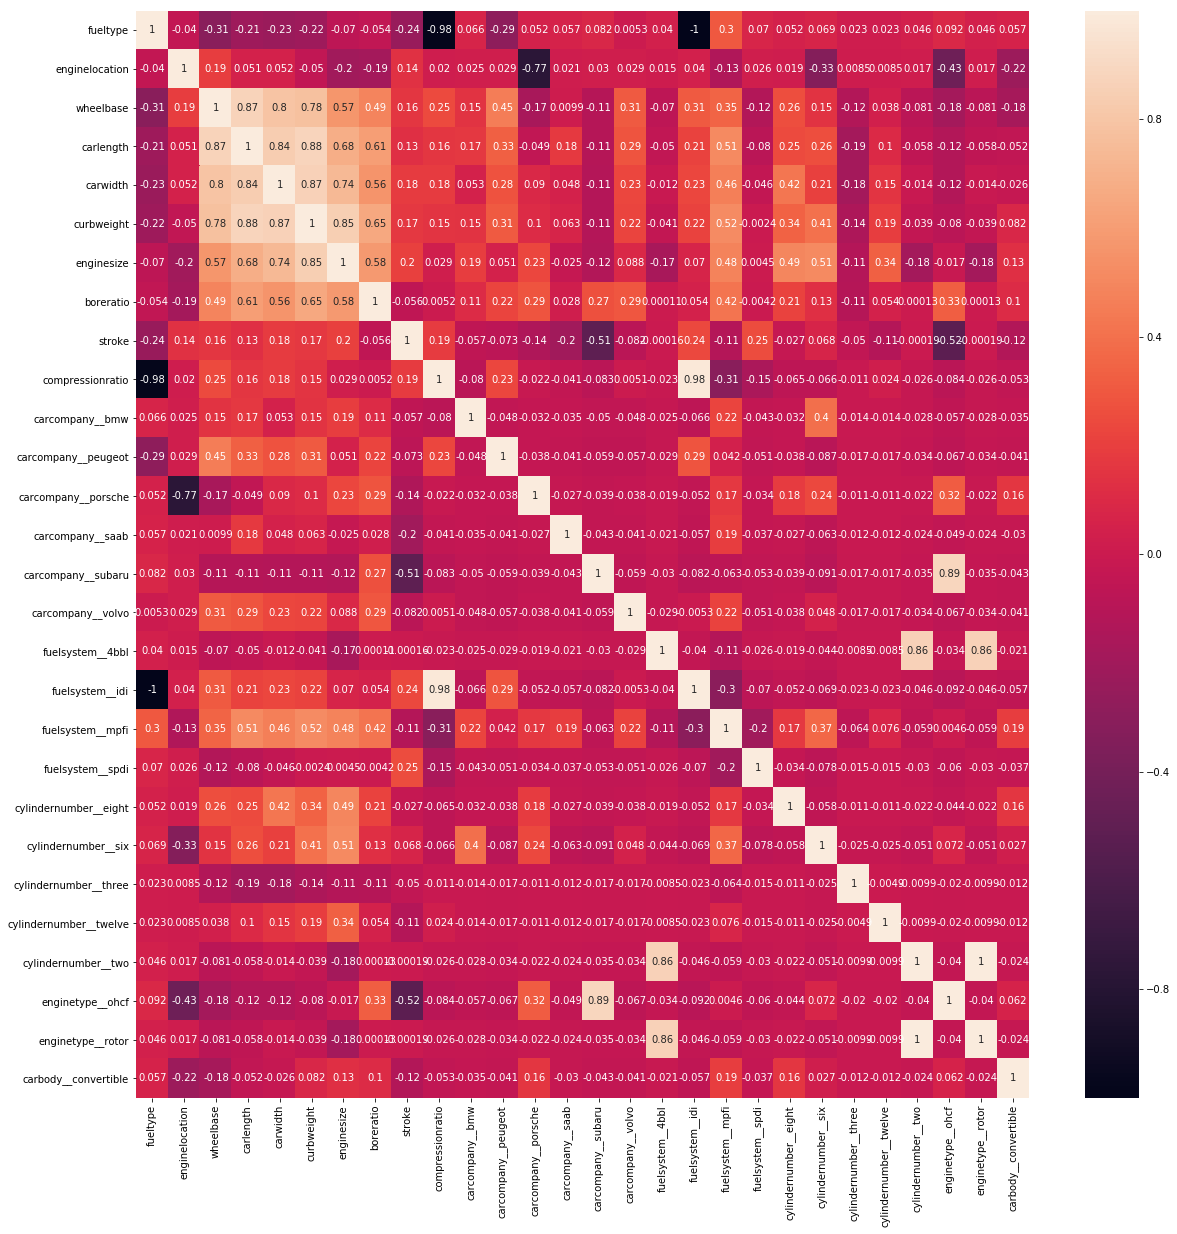

In [273]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,20))     # Size of the figure
car_corr = car[['fueltype',
'enginelocation',
'wheelbase',
'carlength',
'carwidth',
'curbweight',
'enginesize',
'boreratio',
'stroke',
'compressionratio',
'carcompany__bmw',
'carcompany__peugeot',
'carcompany__porsche',
'carcompany__saab',
'carcompany__subaru',
'carcompany__volvo',
'fuelsystem__4bbl',
'fuelsystem__idi',
'fuelsystem__mpfi',
'fuelsystem__spdi',
'cylindernumber__eight',
'cylindernumber__six',
'cylindernumber__three',
'cylindernumber__twelve',
'cylindernumber__two',
'enginetype__ohcf',
'enginetype__rotor',
'carbody__convertible']]
sns.heatmap(car_corr.corr(),annot = True)

# Model 5 -Drop 'fuelsystem__4bbl ' as it has high p-value of 0.395

In [274]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop(['fuelsystem__4bbl'], 1)

In [275]:
# Create fitted model
lm_5 = sm.OLS(y_train,X_train_rfe).fit()
#summary of linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     97.02
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           2.63e-66
Time:                        23:24:44   Log-Likelihood:                 249.01
No. Observations:                 143   AIC:                            -448.0
Df Residuals:                     118   BIC:                            -373.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [276]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'aspiration', 'doornumber', 'carheight', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'carcompany__alfa-romero',
       'carcompany__audi', 'carcompany__buick', 'carcompany__chevrolet',
       'carcompany__dodge', 'carcompany__honda', 'carcompany__isuzu',
       'carcompany__jaguar', 'carcompany__mazda', 'carcompany__mercury',
       'carcompany__mitsubishi', 'carcompany__nissan', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__toyota', 'carcompany__volkswagen',
       'fuelsystem__mfi', 'fuelsystem__spfi', 'cylindernumber__five',
       'cylindernumber__four', 'enginetype__dohc', 'enginetype__dohcv',
       'enginetype__l', 'enginetype__ohc', 'enginetype__ohcv',
       'carbody__hardtop', 'carbody__hatchback', 'carbody__sedan',
       'carbody__wagon', 'drivewheel__4wd', 'drivewheel__fwd',
       'drivewheel__rwd','fuelsystem__2bbl','fuelsystem__1bbl','fuelsystem__4bbl'], axis=1), dependent_col="price")

C:\Users\Z001MC7\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Var           Vif
0                 fueltype           inf
1           enginelocation           inf
16         fuelsystem__idi           inf
14      carcompany__subaru           inf
23     cylindernumber__two  4.010394e+06
25       enginetype__rotor  8.653503e+05
24        enginetype__ohcf  8.974299e+04
9         compressionratio  9.802000e+01
6               enginesize  2.580000e+01
5               curbweight  1.742000e+01
3                carlength  1.119000e+01
2                wheelbase  8.790000e+00
4                 carwidth  7.010000e+00
7                boreratio  5.790000e+00
20     cylindernumber__six  5.520000e+00
12     carcompany__porsche  4.540000e+00
19   cylindernumber__eight  4.140000e+00
22  cylindernumber__twelve  3.730000e+00
8                   stroke  3.010000e+00
11     carcompany__peugeot  2.460000e+00
17        fuelsystem__mpfi  2.420000e+00
15       carcompany__volvo  1.940000e+00
18        fuelsystem__spdi  1.700000e+00
10         carcompany__bmw  1.590000e+00
13        carcompany__saab  1.490000e+00
26    carbody__convertible  1.310000e+00
21   cylindernumber__three  1.080000e+00

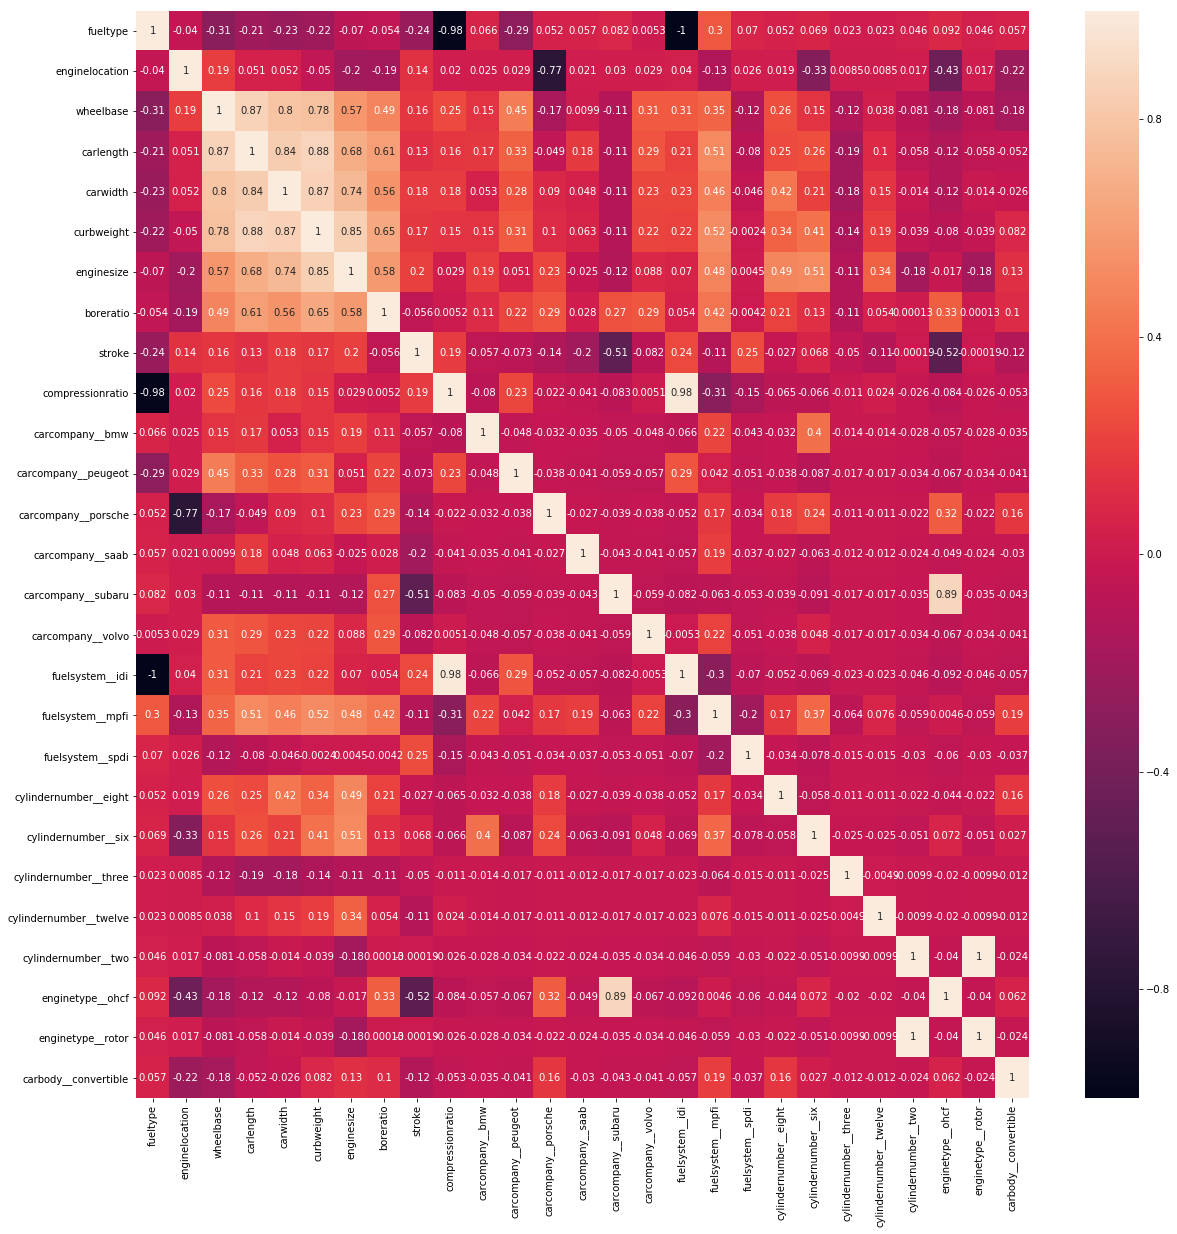

In [277]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,20))     # Size of the figure
car_corr = car[['fueltype',
'enginelocation',
'wheelbase',
'carlength',
'carwidth',
'curbweight',
'enginesize',
'boreratio',
'stroke',
'compressionratio',
'carcompany__bmw',
'carcompany__peugeot',
'carcompany__porsche',
'carcompany__saab',
'carcompany__subaru',
'carcompany__volvo',
'fuelsystem__idi',
'fuelsystem__mpfi',
'fuelsystem__spdi',
'cylindernumber__eight',
'cylindernumber__six',
'cylindernumber__three',
'cylindernumber__twelve',
'cylindernumber__two',
'enginetype__ohcf',
'enginetype__rotor',
'carbody__convertible']]
sns.heatmap(car_corr.corr(),annot = True)

# Model 6 -Drop 'fuelsystem__mpfi' as it has high p-value of 0.470

In [278]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop(['fuelsystem__mpfi'], 1)

In [279]:
# Create fitted model
lm_6 = sm.OLS(y_train,X_train_rfe).fit()
#summary of linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     101.6
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           3.34e-67
Time:                        23:24:53   Log-Likelihood:                 248.69
No. Observations:                 143   AIC:                            -449.4
Df Residuals:                     119   BIC:                            -378.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [280]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'aspiration', 'doornumber', 'carheight', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'carcompany__alfa-romero',
       'carcompany__audi', 'carcompany__buick', 'carcompany__chevrolet',
       'carcompany__dodge', 'carcompany__honda', 'carcompany__isuzu',
       'carcompany__jaguar', 'carcompany__mazda', 'carcompany__mercury',
       'carcompany__mitsubishi', 'carcompany__nissan', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__toyota', 'carcompany__volkswagen',
       'fuelsystem__mfi', 'fuelsystem__spfi', 'cylindernumber__five',
       'cylindernumber__four', 'enginetype__dohc', 'enginetype__dohcv',
       'enginetype__l', 'enginetype__ohc', 'enginetype__ohcv',
       'carbody__hardtop', 'carbody__hatchback', 'carbody__sedan',
       'carbody__wagon', 'drivewheel__4wd', 'drivewheel__fwd',
       'drivewheel__rwd','fuelsystem__2bbl','fuelsystem__1bbl','fuelsystem__4bbl','fuelsystem__mpfi'], axis=1), dependent_col="price")

C:\Users\Z001MC7\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Var           Vif
0                 fueltype           inf
1           enginelocation           inf
16         fuelsystem__idi           inf
14      carcompany__subaru           inf
24       enginetype__rotor  4.771360e+06
22     cylindernumber__two  6.470502e+05
23        enginetype__ohcf  5.055878e+04
9         compressionratio  9.802000e+01
6               enginesize  2.575000e+01
5               curbweight  1.726000e+01
3                carlength  1.106000e+01
2                wheelbase  8.760000e+00
4                 carwidth  6.850000e+00
7                boreratio  5.760000e+00
19     cylindernumber__six  5.450000e+00
12     carcompany__porsche  4.530000e+00
18   cylindernumber__eight  4.060000e+00
21  cylindernumber__twelve  3.740000e+00
8                   stroke  3.010000e+00
11     carcompany__peugeot  2.460000e+00
15       carcompany__volvo  1.930000e+00
17        fuelsystem__spdi  1.620000e+00
10         carcompany__bmw  1.570000e+00
13        carcompany__saab  1.470000e+00
25    carbody__convertible  1.230000e+00
20   cylindernumber__three  1.080000e+00

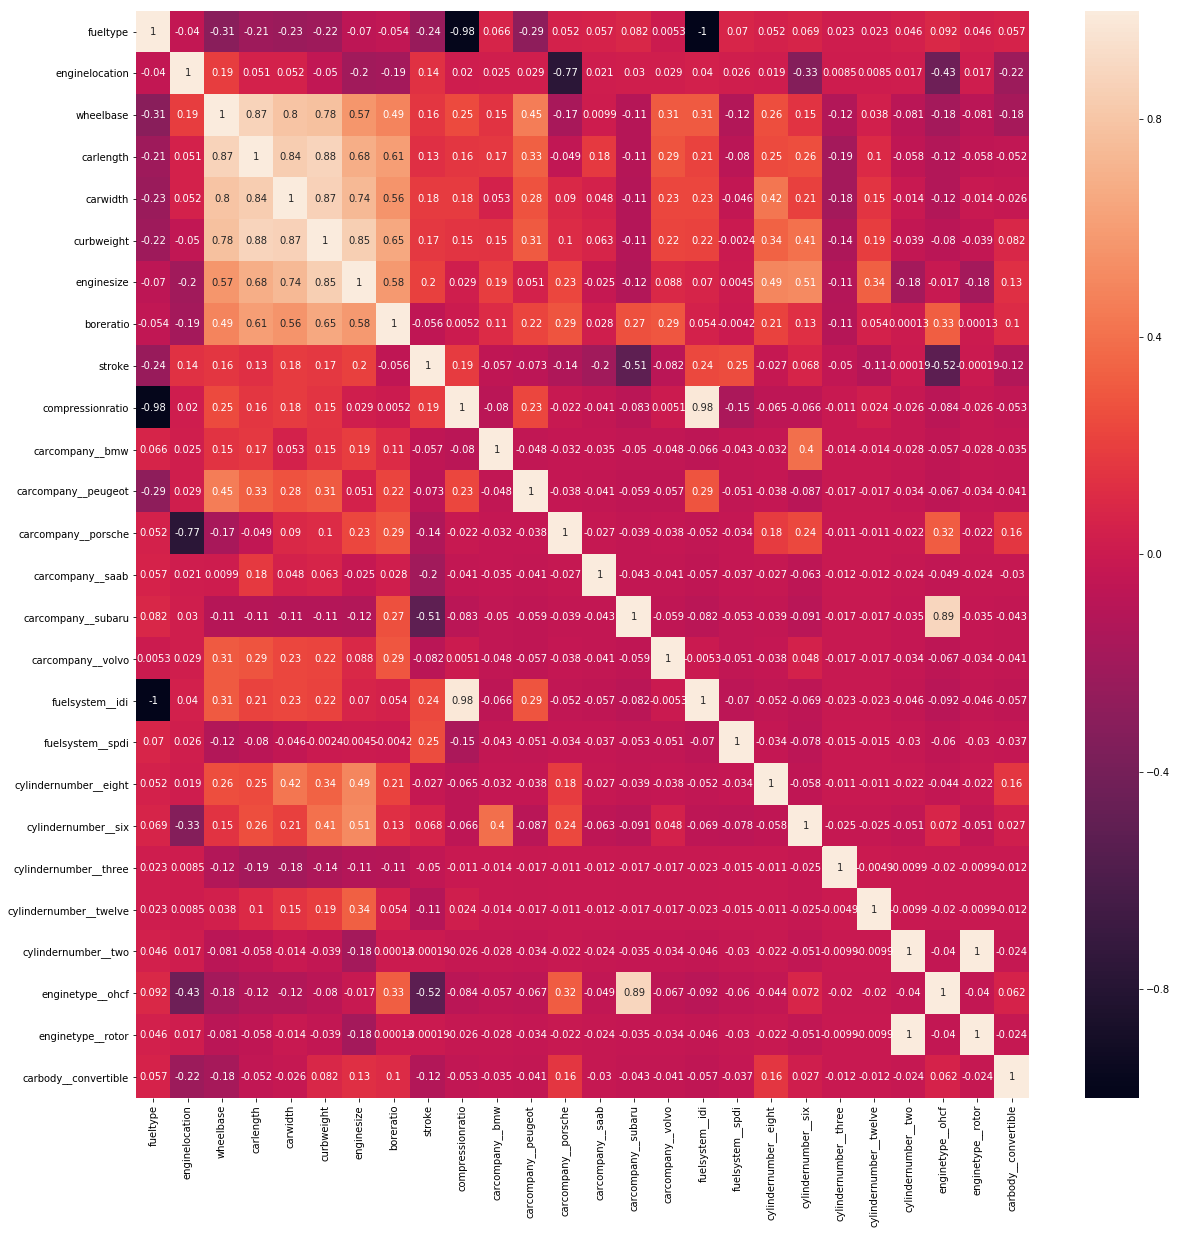

In [281]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,20))     # Size of the figure
car_corr = car[['fueltype',
'enginelocation',
'wheelbase',
'carlength',
'carwidth',
'curbweight',
'enginesize',
'boreratio',
'stroke',
'compressionratio',
'carcompany__bmw',
'carcompany__peugeot',
'carcompany__porsche',
'carcompany__saab',
'carcompany__subaru',
'carcompany__volvo',
'fuelsystem__idi',
'fuelsystem__spdi',
'cylindernumber__eight',
'cylindernumber__six',
'cylindernumber__three',
'cylindernumber__twelve',
'cylindernumber__two',
'enginetype__ohcf',
'enginetype__rotor',
'carbody__convertible']]
sns.heatmap(car_corr.corr(),annot = True)

# Model 7 -Drop 'fuelsystem__spdi' as it has high p-value of 0.204

In [282]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop(['fuelsystem__spdi'], 1)

In [283]:
# Create fitted model
lm_7 = sm.OLS(y_train,X_train_rfe).fit()
#summary of linear model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     105.6
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           7.16e-68
Time:                        23:25:01   Log-Likelihood:                 247.72
No. Observations:                 143   AIC:                            -449.4
Df Residuals:                     120   BIC:                            -381.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [284]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'aspiration', 'doornumber', 'carheight', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'carcompany__alfa-romero',
       'carcompany__audi', 'carcompany__buick', 'carcompany__chevrolet',
       'carcompany__dodge', 'carcompany__honda', 'carcompany__isuzu',
       'carcompany__jaguar', 'carcompany__mazda', 'carcompany__mercury',
       'carcompany__mitsubishi', 'carcompany__nissan', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__toyota', 'carcompany__volkswagen',
       'fuelsystem__mfi', 'fuelsystem__spfi', 'cylindernumber__five',
       'cylindernumber__four', 'enginetype__dohc', 'enginetype__dohcv',
       'enginetype__l', 'enginetype__ohc', 'enginetype__ohcv',
       'carbody__hardtop', 'carbody__hatchback', 'carbody__sedan',
       'carbody__wagon', 'drivewheel__4wd', 'drivewheel__fwd',
       'drivewheel__rwd','fuelsystem__2bbl','fuelsystem__1bbl','fuelsystem__4bbl','fuelsystem__mpfi',
        'fuelsystem__spdi'], axis=1), dependent_col="price")

C:\Users\Z001MC7\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Var           Vif
0                 fueltype           inf
16         fuelsystem__idi           inf
1           enginelocation           inf
14      carcompany__subaru           inf
21     cylindernumber__two  1.915370e+06
23       enginetype__rotor  6.493531e+05
22        enginetype__ohcf  2.243575e+04
9         compressionratio  7.438000e+01
6               enginesize  2.567000e+01
5               curbweight  1.726000e+01
3                carlength  1.106000e+01
2                wheelbase  8.660000e+00
4                 carwidth  6.840000e+00
7                boreratio  5.760000e+00
18     cylindernumber__six  5.470000e+00
12     carcompany__porsche  4.510000e+00
17   cylindernumber__eight  4.130000e+00
20  cylindernumber__twelve  3.530000e+00
8                   stroke  2.950000e+00
11     carcompany__peugeot  2.440000e+00
15       carcompany__volvo  1.910000e+00
10         carcompany__bmw  1.570000e+00
13        carcompany__saab  1.460000e+00
24    carbody__convertible  1.100000e+00
19   cylindernumber__three  1.080000e+00

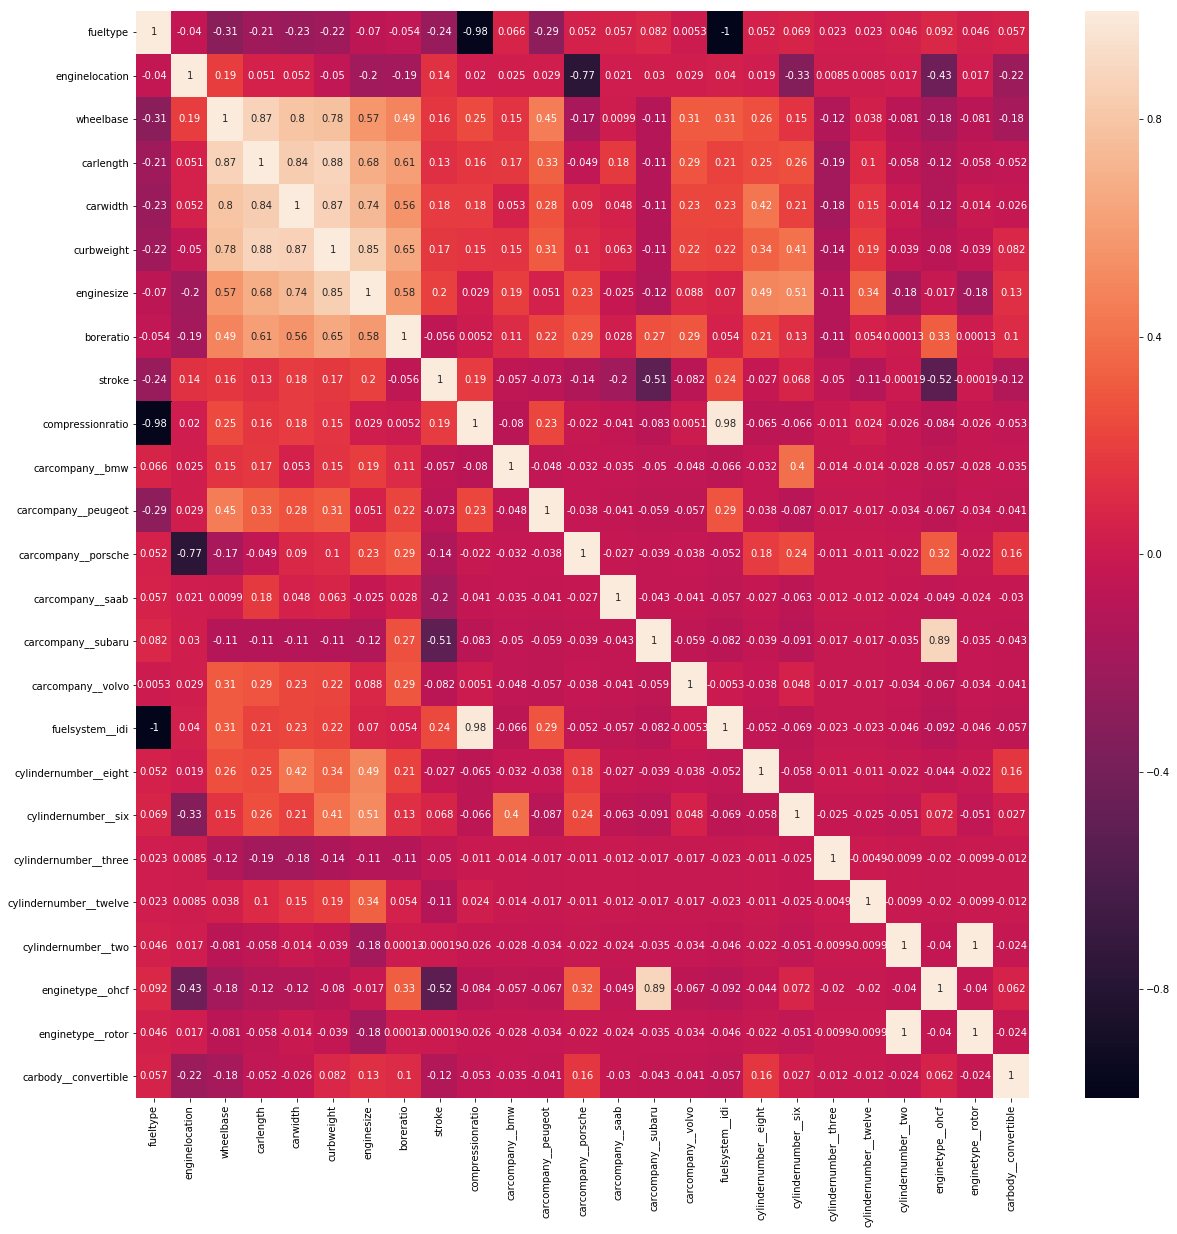

In [285]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,20))     # Size of the figure
car_corr = car[['fueltype',
'enginelocation',
'wheelbase',
'carlength',
'carwidth',
'curbweight',
'enginesize',
'boreratio',
'stroke',
'compressionratio',
'carcompany__bmw',
'carcompany__peugeot',
'carcompany__porsche',
'carcompany__saab',
'carcompany__subaru',
'carcompany__volvo',
'fuelsystem__idi',
'cylindernumber__eight',
'cylindernumber__six',
'cylindernumber__three',
'cylindernumber__twelve',
'cylindernumber__two',
'enginetype__ohcf',
'enginetype__rotor',
'carbody__convertible']]
sns.heatmap(car_corr.corr(),annot = True)

# Model 8 -Drop 'fuelsystem__idi' as it has high p-value of 0.221

In [286]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop(['fuelsystem__idi'], 1)

In [287]:
# Create fitted model
lm_8 = sm.OLS(y_train,X_train_rfe).fit()
#summary of linear model
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     105.6
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           7.16e-68
Time:                        23:25:09   Log-Likelihood:                 247.72
No. Observations:                 143   AIC:                            -449.4
Df Residuals:                     120   BIC:                            -381.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [288]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'aspiration', 'doornumber', 'carheight', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'carcompany__alfa-romero',
       'carcompany__audi', 'carcompany__buick', 'carcompany__chevrolet',
       'carcompany__dodge', 'carcompany__honda', 'carcompany__isuzu',
       'carcompany__jaguar', 'carcompany__mazda', 'carcompany__mercury',
       'carcompany__mitsubishi', 'carcompany__nissan', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__toyota', 'carcompany__volkswagen',
       'fuelsystem__mfi', 'fuelsystem__spfi', 'cylindernumber__five',
       'cylindernumber__four', 'enginetype__dohc', 'enginetype__dohcv',
       'enginetype__l', 'enginetype__ohc', 'enginetype__ohcv',
       'carbody__hardtop', 'carbody__hatchback', 'carbody__sedan',
       'carbody__wagon', 'drivewheel__4wd', 'drivewheel__fwd',
       'drivewheel__rwd','fuelsystem__2bbl','fuelsystem__1bbl','fuelsystem__4bbl','fuelsystem__mpfi',
        'fuelsystem__spdi','fuelsystem__idi'], axis=1), dependent_col="price")

C:\Users\Z001MC7\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Var        Vif
14      carcompany__subaru        inf
22       enginetype__rotor        inf
21        enginetype__ohcf        inf
20     cylindernumber__two        inf
1           enginelocation        inf
0                 fueltype  80.490000
9         compressionratio  74.380000
6               enginesize  25.670000
5               curbweight  17.260000
3                carlength  11.060000
2                wheelbase   8.660000
4                 carwidth   6.840000
7                boreratio   5.760000
17     cylindernumber__six   5.530000
12     carcompany__porsche   4.510000
16   cylindernumber__eight   4.230000
19  cylindernumber__twelve   3.680000
8                   stroke   2.950000
11     carcompany__peugeot   2.440000
15       carcompany__volvo   1.910000
10         carcompany__bmw   1.570000
13        carcompany__saab   1.460000
23    carbody__convertible   1.450000
18   cylindernumber__three   1.080000

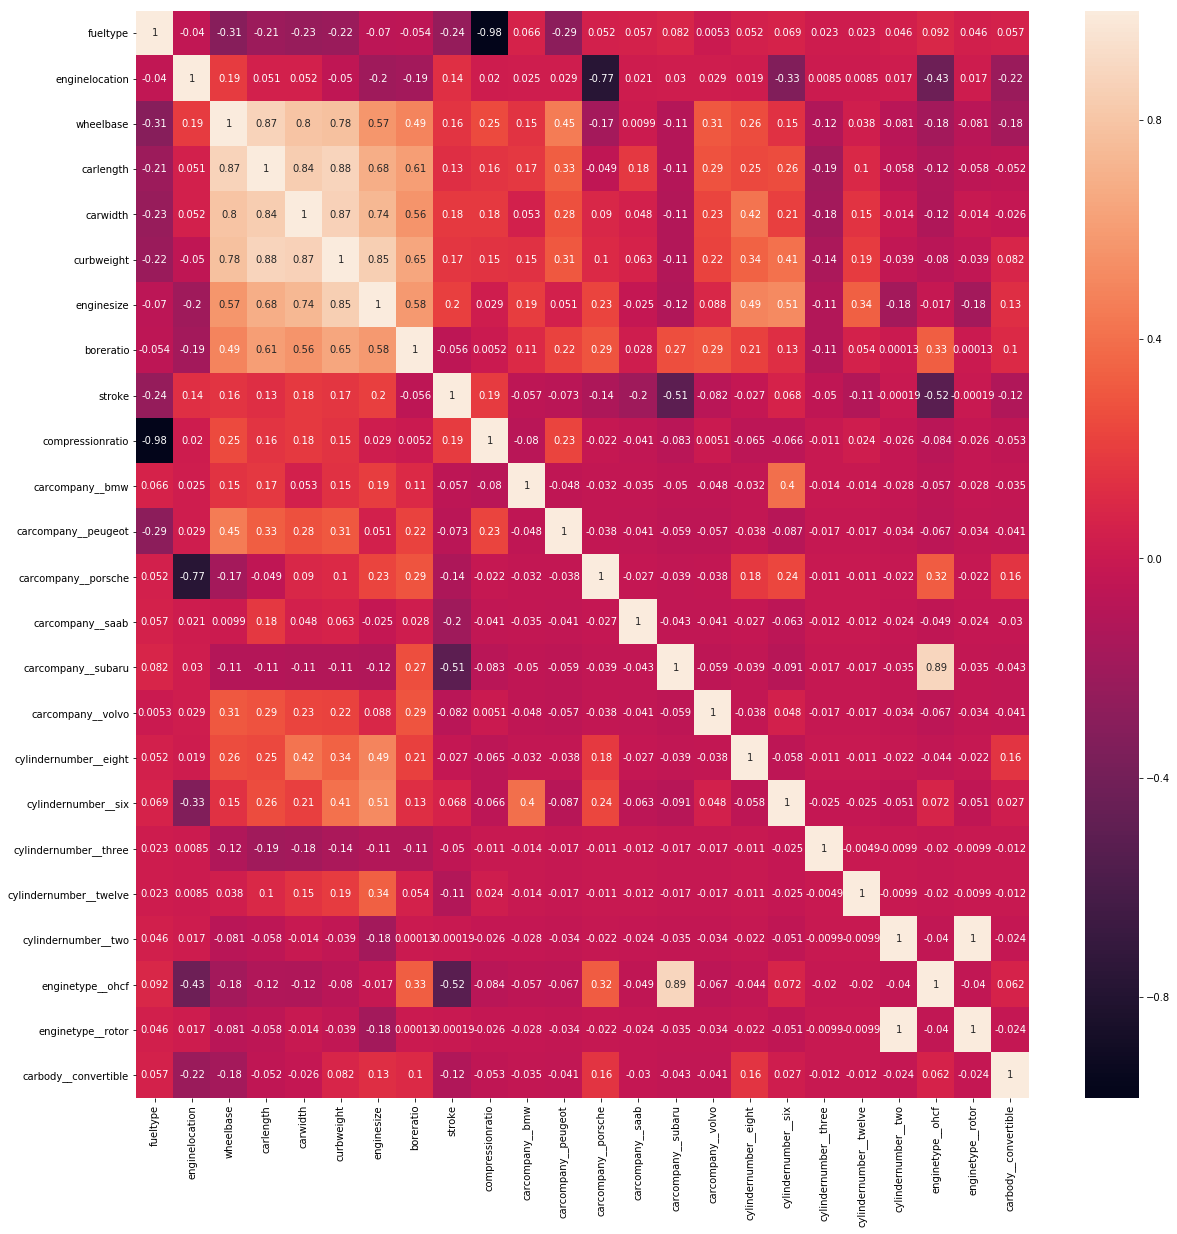

In [289]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,20))     # Size of the figure
car_corr = car[['fueltype',
'enginelocation',
'wheelbase',
'carlength',
'carwidth',
'curbweight',
'enginesize',
'boreratio',
'stroke',
'compressionratio',
'carcompany__bmw',
'carcompany__peugeot',
'carcompany__porsche',
'carcompany__saab',
'carcompany__subaru',
'carcompany__volvo',
'cylindernumber__eight',
'cylindernumber__six',
'cylindernumber__three',
'cylindernumber__twelve',
'cylindernumber__two',
'enginetype__ohcf',
'enginetype__rotor',
'carbody__convertible']]
sns.heatmap(car_corr.corr(),annot = True)

# Model 9 -Drop 'compressionratio' as it has high p-value of 0.292

In [290]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop(['compressionratio'], 1)
# Create fitted model
lm_9 = sm.OLS(y_train,X_train_rfe).fit()
#summary of linear model
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     110.5
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           1.17e-68
Time:                        23:25:17   Log-Likelihood:                 247.05
No. Observations:                 143   AIC:                            -450.1
Df Residuals:                     121   BIC:                            -384.9
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [291]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'aspiration', 'doornumber', 'carheight', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'carcompany__alfa-romero',
       'carcompany__audi', 'carcompany__buick', 'carcompany__chevrolet',
       'carcompany__dodge', 'carcompany__honda', 'carcompany__isuzu',
       'carcompany__jaguar', 'carcompany__mazda', 'carcompany__mercury',
       'carcompany__mitsubishi', 'carcompany__nissan', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__toyota', 'carcompany__volkswagen',
       'fuelsystem__mfi', 'fuelsystem__spfi', 'cylindernumber__five',
       'cylindernumber__four', 'enginetype__dohc', 'enginetype__dohcv',
       'enginetype__l', 'enginetype__ohc', 'enginetype__ohcv',
       'carbody__hardtop', 'carbody__hatchback', 'carbody__sedan',
       'carbody__wagon', 'drivewheel__4wd', 'drivewheel__fwd',
       'drivewheel__rwd','fuelsystem__2bbl','fuelsystem__1bbl','fuelsystem__4bbl','fuelsystem__mpfi',
        'fuelsystem__spdi','fuelsystem__idi','compressionratio'], axis=1), dependent_col="price")

C:\Users\Z001MC7\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Var        Vif
19     cylindernumber__two        inf
13      carcompany__subaru        inf
21       enginetype__rotor        inf
20        enginetype__ohcf        inf
1           enginelocation        inf
6               enginesize  25.340000
5               curbweight  14.950000
3                carlength  10.800000
2                wheelbase   8.430000
4                 carwidth   6.840000
7                boreratio   5.730000
16     cylindernumber__six   4.810000
11     carcompany__porsche   4.250000
15   cylindernumber__eight   4.110000
18  cylindernumber__twelve   3.050000
8                   stroke   2.830000
10     carcompany__peugeot   2.290000
14       carcompany__volvo   1.910000
9          carcompany__bmw   1.500000
12        carcompany__saab   1.450000
22    carbody__convertible   1.410000
0                 fueltype   1.340000
17   cylindernumber__three   1.080000

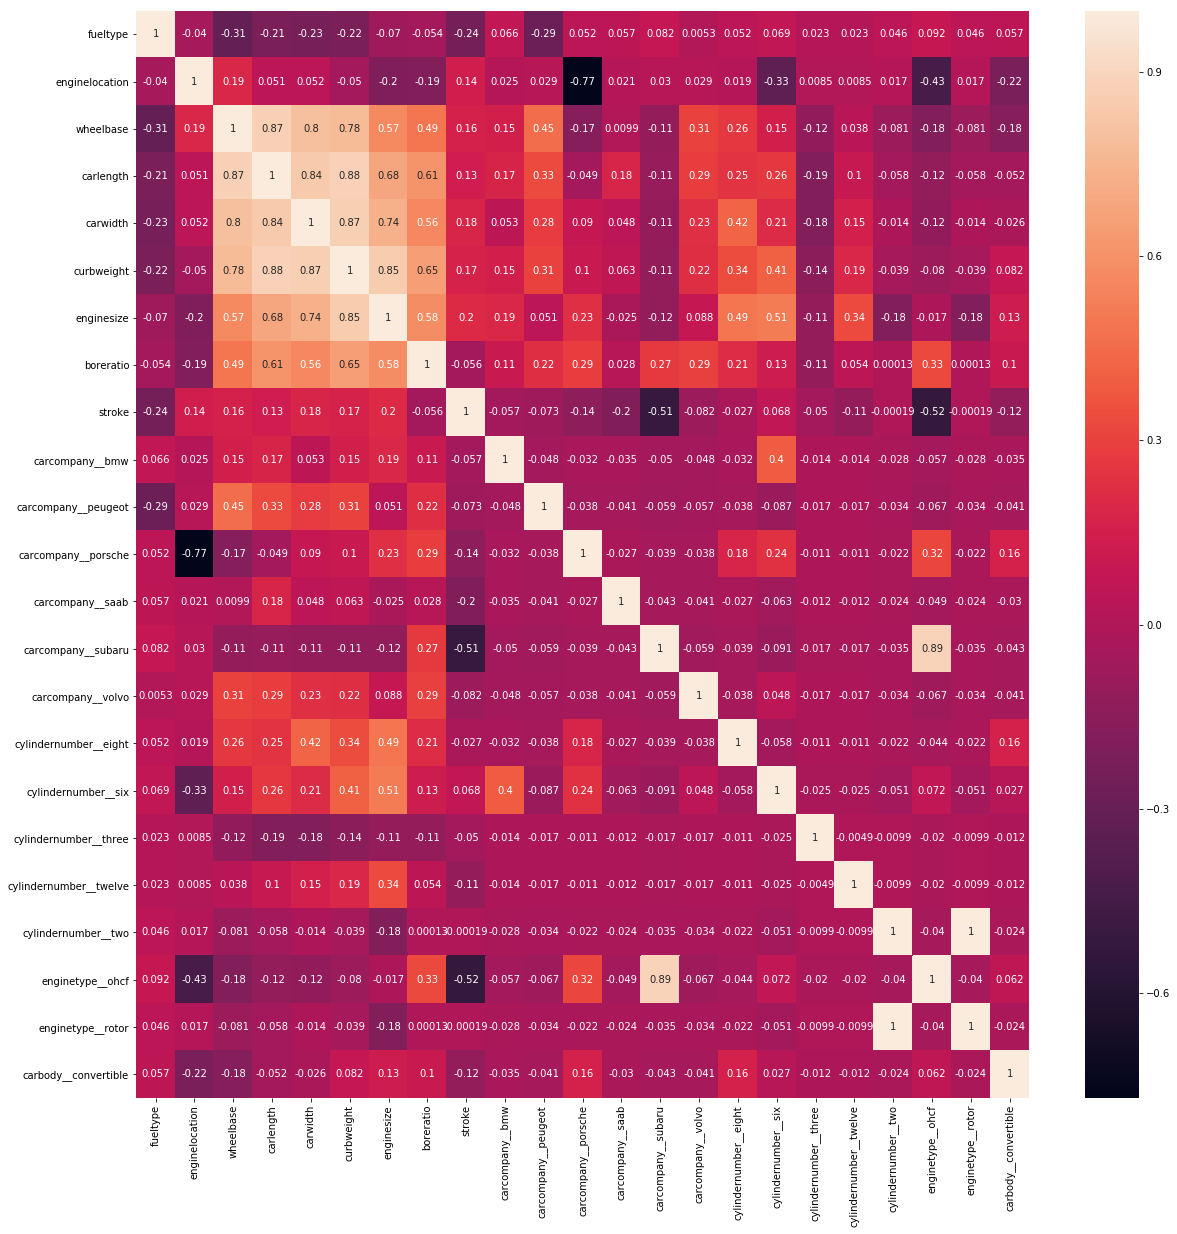

In [292]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,20))     # Size of the figure
car_corr = car[['fueltype',
'enginelocation',
'wheelbase',
'carlength',
'carwidth',
'curbweight',
'enginesize',
'boreratio',
'stroke',
'carcompany__bmw',
'carcompany__peugeot',
'carcompany__porsche',
'carcompany__saab',
'carcompany__subaru',
'carcompany__volvo',
'cylindernumber__eight',
'cylindernumber__six',
'cylindernumber__three',
'cylindernumber__twelve',
'cylindernumber__two',
'enginetype__ohcf',
'enginetype__rotor',
'carbody__convertible']]
sns.heatmap(car_corr.corr(),annot = True)

# Model 10 -Drop 'fueltype' as it has high p-value of 0.171

In [293]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop(['fueltype'], 1)
# Create fitted model
lm_10 = sm.OLS(y_train,X_train_rfe).fit()
#summary of linear model
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     115.1
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           2.72e-69
Time:                        23:25:25   Log-Likelihood:                 245.94
No. Observations:                 143   AIC:                            -449.9
Df Residuals:                     122   BIC:                            -387.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [294]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'aspiration', 'doornumber', 'carheight', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'carcompany__alfa-romero',
       'carcompany__audi', 'carcompany__buick', 'carcompany__chevrolet',
       'carcompany__dodge', 'carcompany__honda', 'carcompany__isuzu',
       'carcompany__jaguar', 'carcompany__mazda', 'carcompany__mercury',
       'carcompany__mitsubishi', 'carcompany__nissan', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__toyota', 'carcompany__volkswagen',
       'fuelsystem__mfi', 'fuelsystem__spfi', 'cylindernumber__five',
       'cylindernumber__four', 'enginetype__dohc', 'enginetype__dohcv',
       'enginetype__l', 'enginetype__ohc', 'enginetype__ohcv',
       'carbody__hardtop', 'carbody__hatchback', 'carbody__sedan',
       'carbody__wagon', 'drivewheel__4wd', 'drivewheel__fwd',
       'drivewheel__rwd','fuelsystem__2bbl','fuelsystem__1bbl','fuelsystem__4bbl','fuelsystem__mpfi',
        'fuelsystem__spdi','fuelsystem__idi','compressionratio','fueltype'], axis=1), dependent_col="price")

C:\Users\Z001MC7\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Var        Vif
0           enginelocation        inf
19        enginetype__ohcf        inf
20       enginetype__rotor        inf
12      carcompany__subaru        inf
18     cylindernumber__two        inf
5               enginesize  25.170000
4               curbweight  14.600000
2                carlength  10.700000
1                wheelbase   8.200000
3                 carwidth   6.830000
6                boreratio   5.680000
15     cylindernumber__six   4.780000
10     carcompany__porsche   4.250000
14   cylindernumber__eight   4.100000
17  cylindernumber__twelve   3.040000
7                   stroke   2.690000
9      carcompany__peugeot   2.280000
13       carcompany__volvo   1.910000
8          carcompany__bmw   1.490000
11        carcompany__saab   1.450000
21    carbody__convertible   1.410000
16   cylindernumber__three   1.080000

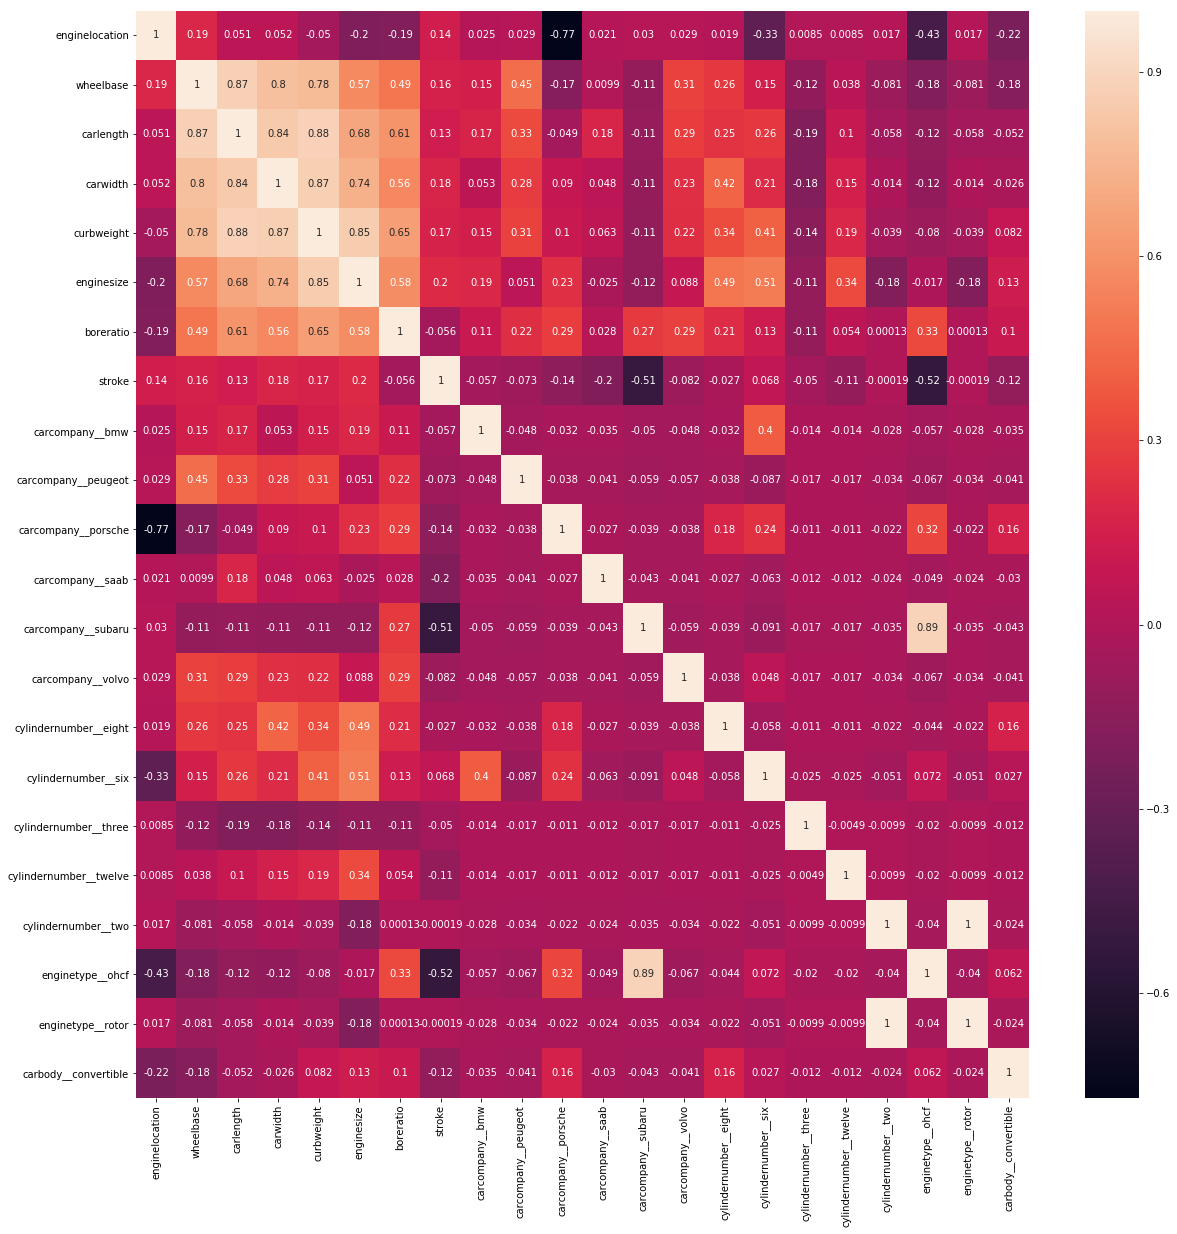

In [295]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,20))     # Size of the figure
car_corr = car[[
'enginelocation',
'wheelbase',
'carlength',
'carwidth',
'curbweight',
'enginesize',
'boreratio',
'stroke',
'carcompany__bmw',
'carcompany__peugeot',
'carcompany__porsche',
'carcompany__saab',
'carcompany__subaru',
'carcompany__volvo',
'cylindernumber__eight',
'cylindernumber__six',
'cylindernumber__three',
'cylindernumber__twelve',
'cylindernumber__two',
'enginetype__ohcf',
'enginetype__rotor',
'carbody__convertible']]
sns.heatmap(car_corr.corr(),annot = True)

# Model 11 -Drop 'wheelbase' as it has high p-value of 0.076

In [296]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop(['wheelbase'], 1)
# Create fitted model
lm_11 = sm.OLS(y_train,X_train_rfe).fit()
#summary of linear model
print(lm_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     118.8
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           1.18e-69
Time:                        23:25:32   Log-Likelihood:                 244.09
No. Observations:                 143   AIC:                            -448.2
Df Residuals:                     123   BIC:                            -388.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [297]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'aspiration', 'doornumber', 'carheight', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'carcompany__alfa-romero',
       'carcompany__audi', 'carcompany__buick', 'carcompany__chevrolet',
       'carcompany__dodge', 'carcompany__honda', 'carcompany__isuzu',
       'carcompany__jaguar', 'carcompany__mazda', 'carcompany__mercury',
       'carcompany__mitsubishi', 'carcompany__nissan', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__toyota', 'carcompany__volkswagen',
       'fuelsystem__mfi', 'fuelsystem__spfi', 'cylindernumber__five',
       'cylindernumber__four', 'enginetype__dohc', 'enginetype__dohcv',
       'enginetype__l', 'enginetype__ohc', 'enginetype__ohcv',
       'carbody__hardtop', 'carbody__hatchback', 'carbody__sedan',
       'carbody__wagon', 'drivewheel__4wd', 'drivewheel__fwd',
       'drivewheel__rwd','fuelsystem__2bbl','fuelsystem__1bbl','fuelsystem__4bbl','fuelsystem__mpfi',
        'fuelsystem__spdi','fuelsystem__idi','compressionratio','fueltype','wheelbase'], axis=1), dependent_col="price")

C:\Users\Z001MC7\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Var        Vif
0           enginelocation        inf
18        enginetype__ohcf        inf
19       enginetype__rotor        inf
11      carcompany__subaru        inf
17     cylindernumber__two        inf
4               enginesize  24.630000
3               curbweight  14.600000
1                carlength   7.910000
2                 carwidth   6.600000
5                boreratio   5.520000
14     cylindernumber__six   4.590000
9      carcompany__porsche   4.170000
13   cylindernumber__eight   4.100000
16  cylindernumber__twelve   2.900000
6                   stroke   2.690000
8      carcompany__peugeot   1.930000
12       carcompany__volvo   1.790000
7          carcompany__bmw   1.460000
10        carcompany__saab   1.370000
20    carbody__convertible   1.280000
15   cylindernumber__three   1.070000

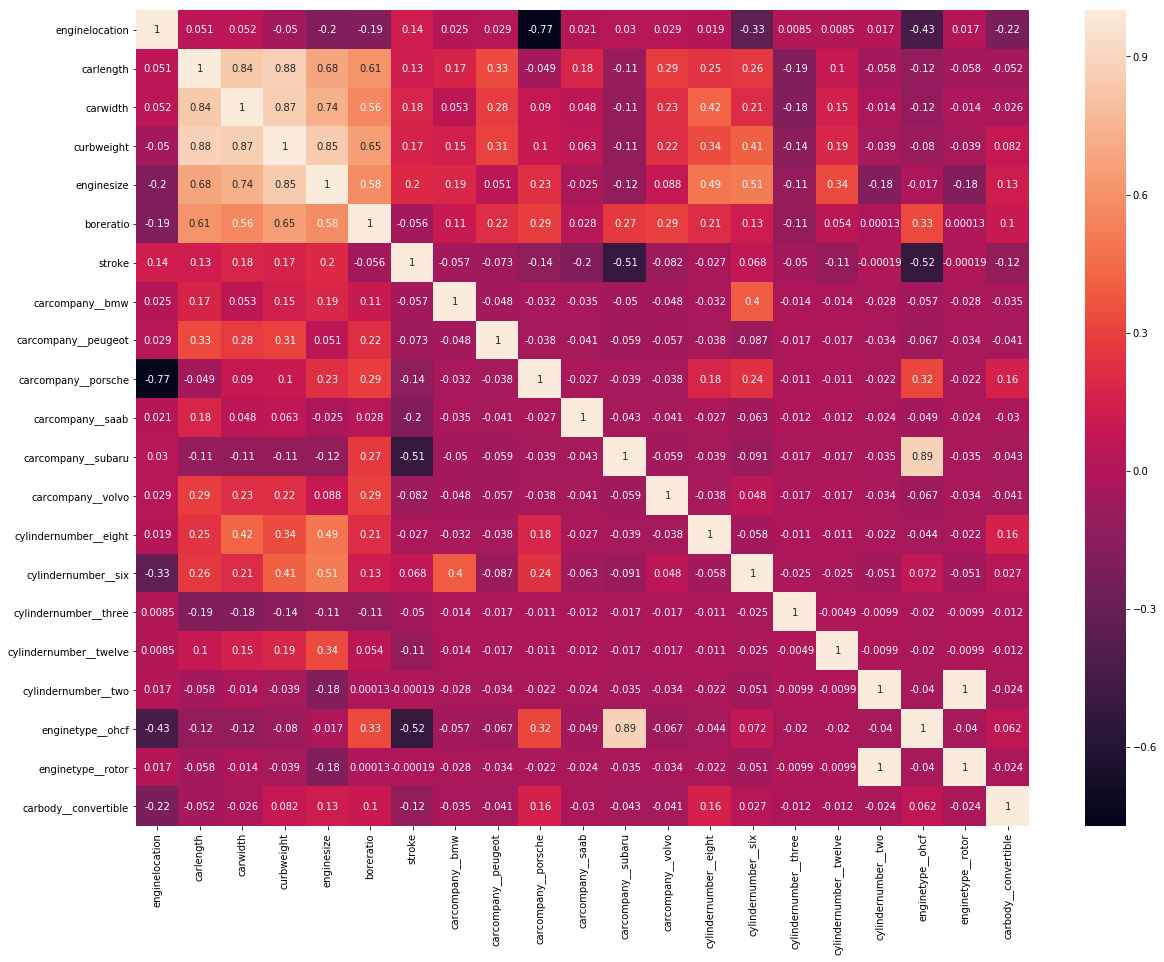

In [298]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,15))     # Size of the figure
car_corr = car[[
'enginelocation',
'carlength',
'carwidth',
'curbweight',
'enginesize',
'boreratio',
'stroke',
'carcompany__bmw',
'carcompany__peugeot',
'carcompany__porsche',
'carcompany__saab',
'carcompany__subaru',
'carcompany__volvo',
'cylindernumber__eight',
'cylindernumber__six',
'cylindernumber__three',
'cylindernumber__twelve',
'cylindernumber__two',
'enginetype__ohcf',
'enginetype__rotor',
'carbody__convertible']]
sns.heatmap(car_corr.corr(),annot = True)

# Model 12 -Drop 'carlength' as it has high p-value of 0.275

In [299]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop(['carlength'], 1)
# Create fitted model
lm_12 = sm.OLS(y_train,X_train_rfe).fit()
#summary of linear model
print(lm_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     125.2
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           1.87e-70
Time:                        23:25:39   Log-Likelihood:                 243.40
No. Observations:                 143   AIC:                            -448.8
Df Residuals:                     124   BIC:                            -392.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [300]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'aspiration', 'doornumber', 'carheight', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'carcompany__alfa-romero',
       'carcompany__audi', 'carcompany__buick', 'carcompany__chevrolet',
       'carcompany__dodge', 'carcompany__honda', 'carcompany__isuzu',
       'carcompany__jaguar', 'carcompany__mazda', 'carcompany__mercury',
       'carcompany__mitsubishi', 'carcompany__nissan', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__toyota', 'carcompany__volkswagen',
       'fuelsystem__mfi', 'fuelsystem__spfi', 'cylindernumber__five',
       'cylindernumber__four', 'enginetype__dohc', 'enginetype__dohcv',
       'enginetype__l', 'enginetype__ohc', 'enginetype__ohcv',
       'carbody__hardtop', 'carbody__hatchback', 'carbody__sedan',
       'carbody__wagon', 'drivewheel__4wd', 'drivewheel__fwd',
       'drivewheel__rwd','fuelsystem__2bbl','fuelsystem__1bbl','fuelsystem__4bbl','fuelsystem__mpfi',
        'fuelsystem__spdi','fuelsystem__idi','compressionratio','fueltype','wheelbase',
        'carlength'], axis=1), dependent_col="price")

C:\Users\Z001MC7\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Var        Vif
0           enginelocation        inf
16     cylindernumber__two        inf
18       enginetype__rotor        inf
17        enginetype__ohcf        inf
10      carcompany__subaru        inf
3               enginesize  24.480000
2               curbweight  11.860000
1                 carwidth   5.570000
4                boreratio   5.310000
13     cylindernumber__six   4.580000
12   cylindernumber__eight   4.100000
8      carcompany__porsche   3.630000
15  cylindernumber__twelve   2.890000
5                   stroke   2.670000
7      carcompany__peugeot   1.930000
11       carcompany__volvo   1.780000
6          carcompany__bmw   1.420000
9         carcompany__saab   1.300000
19    carbody__convertible   1.230000
14   cylindernumber__three   1.050000

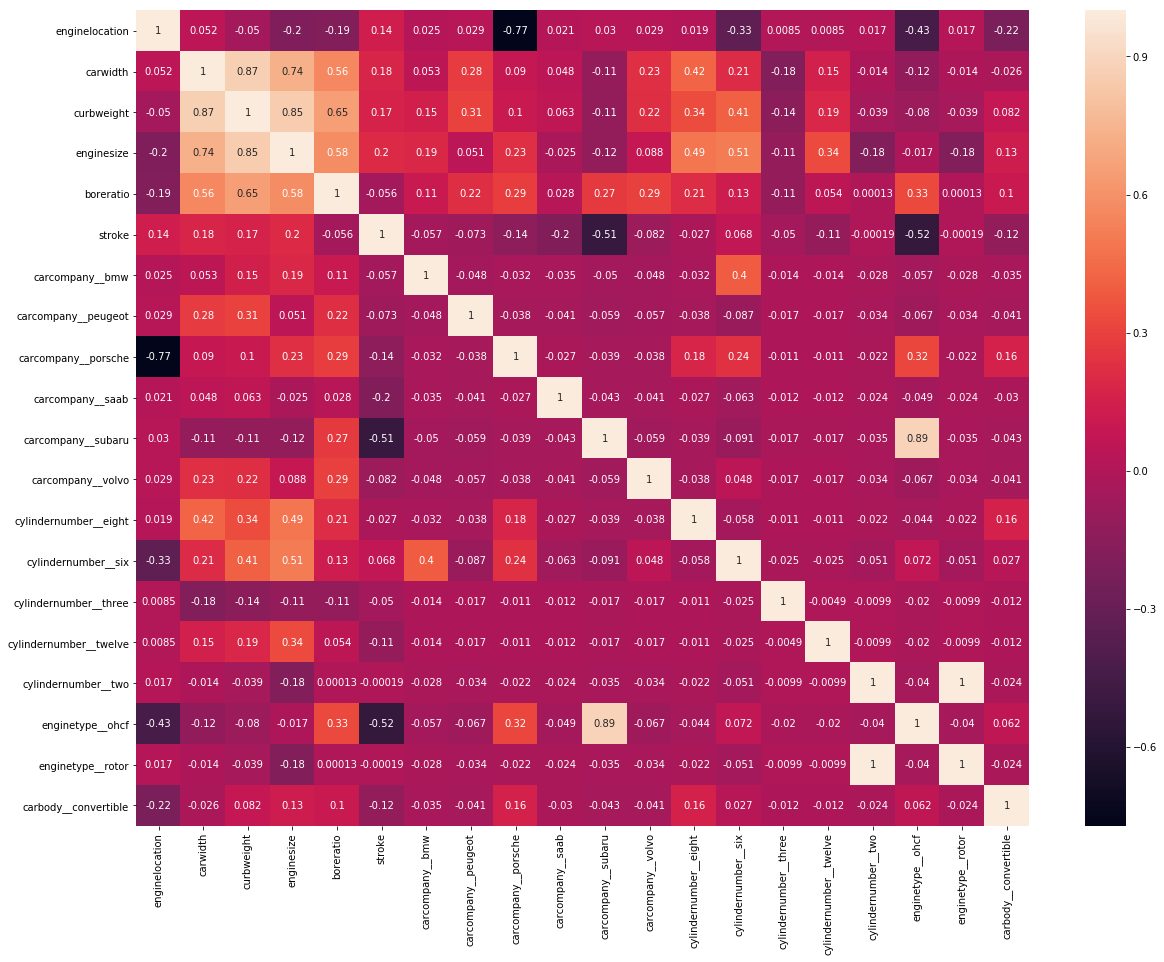

In [301]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,15))     # Size of the figure
car_corr = car[[
'enginelocation',
'carwidth',
'curbweight',
'enginesize',
'boreratio',
'stroke',
'carcompany__bmw',
'carcompany__peugeot',
'carcompany__porsche',
'carcompany__saab',
'carcompany__subaru',
'carcompany__volvo',
'cylindernumber__eight',
'cylindernumber__six',
'cylindernumber__three',
'cylindernumber__twelve',
'cylindernumber__two',
'enginetype__ohcf',
'enginetype__rotor',
'carbody__convertible']]
sns.heatmap(car_corr.corr(),annot = True)

# Model 13 -Drop 'carcompany__peugeot' as it has high p-value of 0.303

In [302]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop(['carcompany__peugeot'], 1)
# Create fitted model
lm_13 = sm.OLS(y_train,X_train_rfe).fit()
#summary of linear model
print(lm_13.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     132.4
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           2.71e-71
Time:                        23:25:45   Log-Likelihood:                 242.78
No. Observations:                 143   AIC:                            -449.6
Df Residuals:                     125   BIC:                            -396.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [303]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'aspiration', 'doornumber', 'carheight', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'carcompany__alfa-romero',
       'carcompany__audi', 'carcompany__buick', 'carcompany__chevrolet',
       'carcompany__dodge', 'carcompany__honda', 'carcompany__isuzu',
       'carcompany__jaguar', 'carcompany__mazda', 'carcompany__mercury',
       'carcompany__mitsubishi', 'carcompany__nissan', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__toyota', 'carcompany__volkswagen',
       'fuelsystem__mfi', 'fuelsystem__spfi', 'cylindernumber__five',
       'cylindernumber__four', 'enginetype__dohc', 'enginetype__dohcv',
       'enginetype__l', 'enginetype__ohc', 'enginetype__ohcv',
       'carbody__hardtop', 'carbody__hatchback', 'carbody__sedan',
       'carbody__wagon', 'drivewheel__4wd', 'drivewheel__fwd',
       'drivewheel__rwd','fuelsystem__2bbl','fuelsystem__1bbl','fuelsystem__4bbl','fuelsystem__mpfi',
        'fuelsystem__spdi','fuelsystem__idi','compressionratio','fueltype','wheelbase',
        'carlength','carcompany__peugeot'], axis=1), dependent_col="price")

C:\Users\Z001MC7\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Var        Vif
0           enginelocation        inf
15     cylindernumber__two        inf
17       enginetype__rotor        inf
16        enginetype__ohcf        inf
9       carcompany__subaru        inf
3               enginesize  20.930000
2               curbweight   9.900000
1                 carwidth   5.510000
4                boreratio   4.820000
12     cylindernumber__six   4.560000
11   cylindernumber__eight   4.060000
7      carcompany__porsche   3.450000
14  cylindernumber__twelve   2.850000
5                   stroke   2.520000
10       carcompany__volvo   1.430000
6          carcompany__bmw   1.390000
18    carbody__convertible   1.200000
8         carcompany__saab   1.170000
13   cylindernumber__three   1.050000

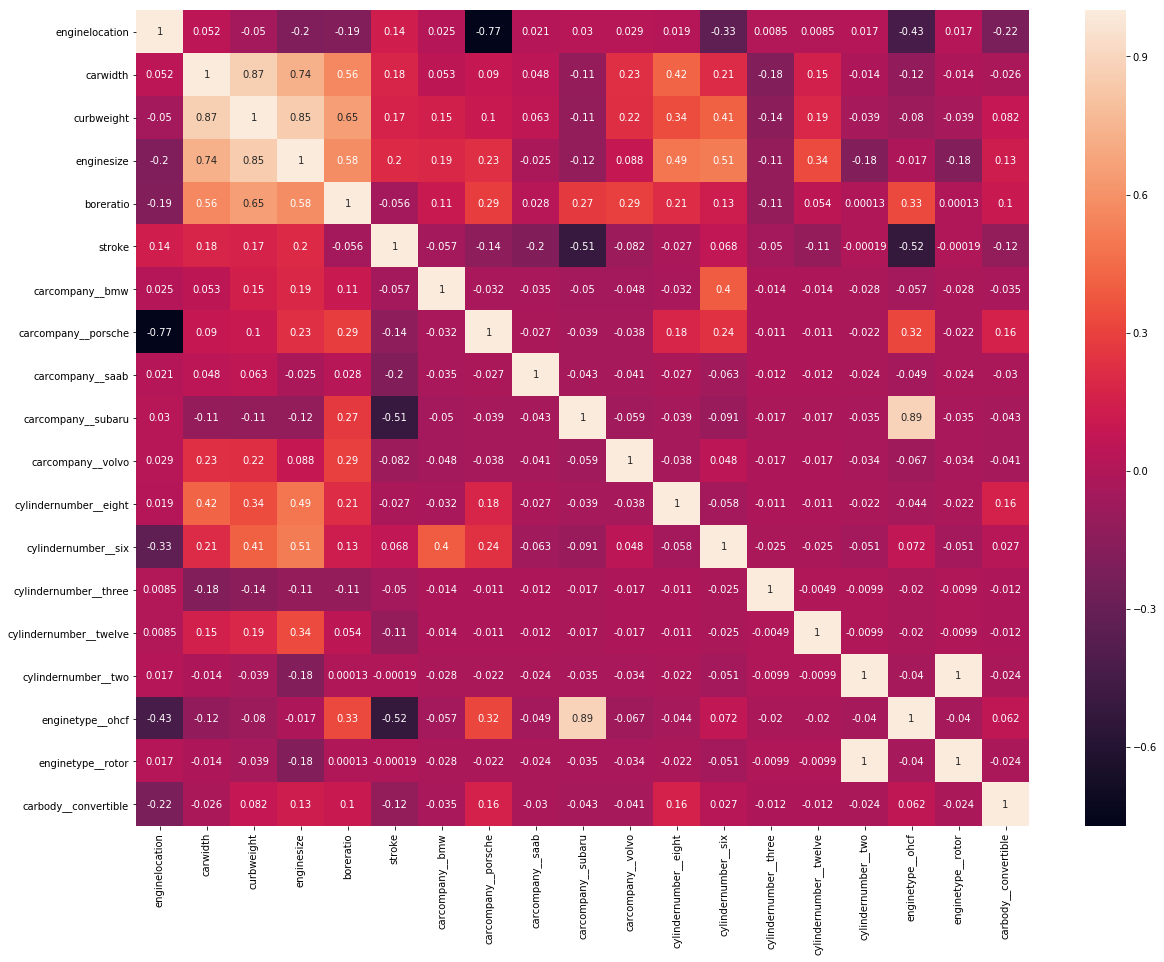

In [304]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,15))     # Size of the figure
car_corr = car[[
'enginelocation',
'carwidth',
'curbweight',
'enginesize',
'boreratio',
'stroke',
'carcompany__bmw',
'carcompany__porsche',
'carcompany__saab',
'carcompany__subaru',
'carcompany__volvo',
'cylindernumber__eight',
'cylindernumber__six',
'cylindernumber__three',
'cylindernumber__twelve',
'cylindernumber__two',
'enginetype__ohcf',
'enginetype__rotor',
'carbody__convertible']]
sns.heatmap(car_corr.corr(),annot = True)

# Model 14 -Drop 'carcompany__subaru' as it has high p-value of 0.180

In [305]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop(['carcompany__subaru'], 1)
# Create fitted model
lm_14 = sm.OLS(y_train,X_train_rfe).fit()
#summary of linear model
print(lm_14.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     132.4
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           2.71e-71
Time:                        23:25:50   Log-Likelihood:                 242.78
No. Observations:                 143   AIC:                            -449.6
Df Residuals:                     125   BIC:                            -396.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [306]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'aspiration', 'doornumber', 'carheight', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'carcompany__alfa-romero',
       'carcompany__audi', 'carcompany__buick', 'carcompany__chevrolet',
       'carcompany__dodge', 'carcompany__honda', 'carcompany__isuzu',
       'carcompany__jaguar', 'carcompany__mazda', 'carcompany__mercury',
       'carcompany__mitsubishi', 'carcompany__nissan', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__toyota', 'carcompany__volkswagen',
       'fuelsystem__mfi', 'fuelsystem__spfi', 'cylindernumber__five',
       'cylindernumber__four', 'enginetype__dohc', 'enginetype__dohcv',
       'enginetype__l', 'enginetype__ohc', 'enginetype__ohcv',
       'carbody__hardtop', 'carbody__hatchback', 'carbody__sedan',
       'carbody__wagon', 'drivewheel__4wd', 'drivewheel__fwd',
       'drivewheel__rwd','fuelsystem__2bbl','fuelsystem__1bbl','fuelsystem__4bbl','fuelsystem__mpfi',
        'fuelsystem__spdi','fuelsystem__idi','compressionratio','fueltype','wheelbase',
        'carlength','carcompany__peugeot','carcompany__subaru'], axis=1), dependent_col="price")

C:\Users\Z001MC7\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Var        Vif
16       enginetype__rotor        inf
14     cylindernumber__two        inf
3               enginesize  20.930000
2               curbweight   9.900000
1                 carwidth   5.510000
4                boreratio   4.820000
11     cylindernumber__six   4.560000
10   cylindernumber__eight   4.060000
0           enginelocation   3.960000
7      carcompany__porsche   3.450000
13  cylindernumber__twelve   2.850000
15        enginetype__ohcf   2.710000
5                   stroke   2.520000
9        carcompany__volvo   1.430000
6          carcompany__bmw   1.390000
17    carbody__convertible   1.200000
8         carcompany__saab   1.170000
12   cylindernumber__three   1.050000

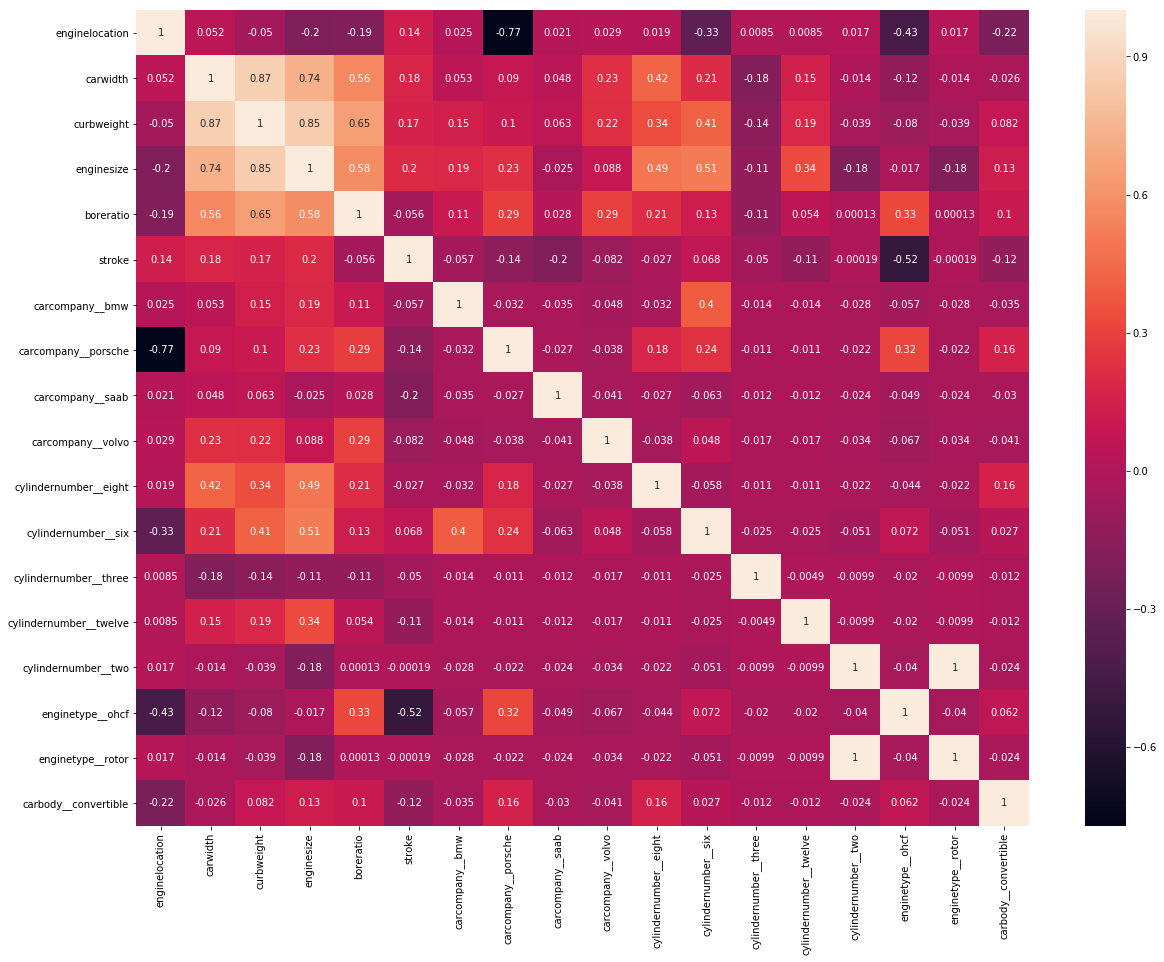

In [307]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,15))     # Size of the figure
car_corr = car[[
'enginelocation',
'carwidth',
'curbweight',
'enginesize',
'boreratio',
'stroke',
'carcompany__bmw',
'carcompany__porsche',
'carcompany__saab',
'carcompany__volvo',
'cylindernumber__eight',
'cylindernumber__six',
'cylindernumber__three',
'cylindernumber__twelve',
'cylindernumber__two',
'enginetype__ohcf',
'enginetype__rotor',
'carbody__convertible']]
sns.heatmap(car_corr.corr(),annot = True)

# Model 15 - Almost all varaibles are at the expected p-Value so now lets look at VIF values.
# Drop 'enginetype__rotor' as VIF is very high

In [308]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop(['enginetype__rotor'], 1)
# Create fitted model
lm_15 = sm.OLS(y_train,X_train_rfe).fit()
#summary of linear model
print(lm_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     132.4
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           2.71e-71
Time:                        23:25:56   Log-Likelihood:                 242.78
No. Observations:                 143   AIC:                            -449.6
Df Residuals:                     125   BIC:                            -396.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [309]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'aspiration', 'doornumber', 'carheight', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'carcompany__alfa-romero',
       'carcompany__audi', 'carcompany__buick', 'carcompany__chevrolet',
       'carcompany__dodge', 'carcompany__honda', 'carcompany__isuzu',
       'carcompany__jaguar', 'carcompany__mazda', 'carcompany__mercury',
       'carcompany__mitsubishi', 'carcompany__nissan', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__toyota', 'carcompany__volkswagen',
       'fuelsystem__mfi', 'fuelsystem__spfi', 'cylindernumber__five',
       'cylindernumber__four', 'enginetype__dohc', 'enginetype__dohcv',
       'enginetype__l', 'enginetype__ohc', 'enginetype__ohcv',
       'carbody__hardtop', 'carbody__hatchback', 'carbody__sedan',
       'carbody__wagon', 'drivewheel__4wd', 'drivewheel__fwd',
       'drivewheel__rwd','fuelsystem__2bbl','fuelsystem__1bbl','fuelsystem__4bbl','fuelsystem__mpfi',
        'fuelsystem__spdi','fuelsystem__idi','compressionratio','fueltype','wheelbase',
        'carlength','carcompany__peugeot','carcompany__subaru','enginetype__rotor'], axis=1), dependent_col="price")

Var    Vif
3               enginesize  20.93
2               curbweight   9.90
1                 carwidth   5.51
4                boreratio   4.82
11     cylindernumber__six   4.56
10   cylindernumber__eight   4.06
0           enginelocation   3.96
7      carcompany__porsche   3.45
13  cylindernumber__twelve   2.85
15        enginetype__ohcf   2.71
5                   stroke   2.52
14     cylindernumber__two   1.47
9        carcompany__volvo   1.43
6          carcompany__bmw   1.39
16    carbody__convertible   1.20
8         carcompany__saab   1.17
12   cylindernumber__three   1.05

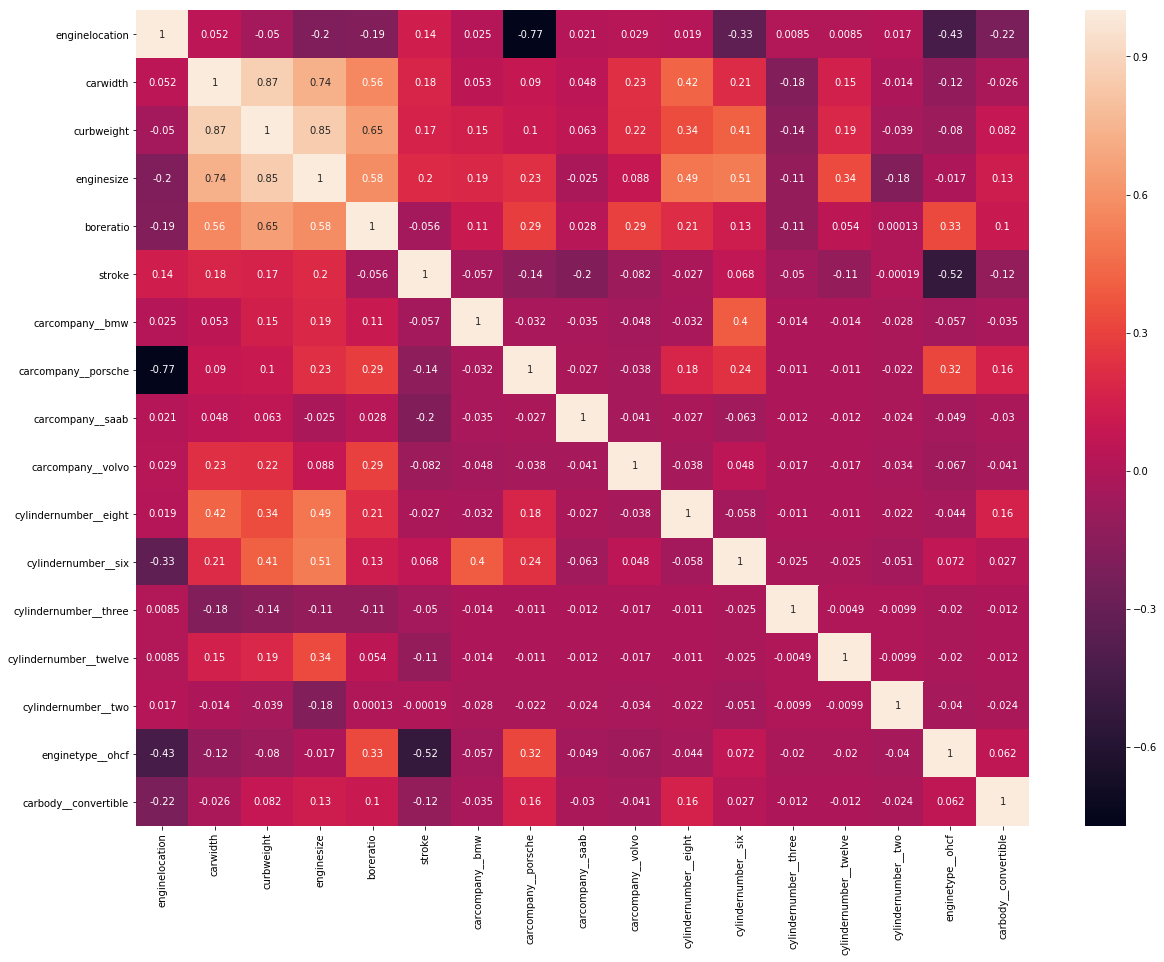

In [310]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,15))     # Size of the figure
car_corr = car[[
'enginelocation',
'carwidth',
'curbweight',
'enginesize',
'boreratio',
'stroke',
'carcompany__bmw',
'carcompany__porsche',
'carcompany__saab',
'carcompany__volvo',
'cylindernumber__eight',
'cylindernumber__six',
'cylindernumber__three',
'cylindernumber__twelve',
'cylindernumber__two',
'enginetype__ohcf',
'carbody__convertible']]
sns.heatmap(car_corr.corr(),annot = True)

# Model 16 - Drop 'carbody__convertible' as p-value is 0.015 and it is the only variable for carbody

In [311]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop(['carbody__convertible'], 1)
# Create fitted model
lm_16 = sm.OLS(y_train,X_train_rfe).fit()
#summary of linear model
print(lm_16.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     134.9
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           4.33e-71
Time:                        23:26:01   Log-Likelihood:                 239.40
No. Observations:                 143   AIC:                            -444.8
Df Residuals:                     126   BIC:                            -394.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [312]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'aspiration', 'doornumber', 'carheight', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'carcompany__alfa-romero',
       'carcompany__audi', 'carcompany__buick', 'carcompany__chevrolet',
       'carcompany__dodge', 'carcompany__honda', 'carcompany__isuzu',
       'carcompany__jaguar', 'carcompany__mazda', 'carcompany__mercury',
       'carcompany__mitsubishi', 'carcompany__nissan', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__toyota', 'carcompany__volkswagen',
       'fuelsystem__mfi', 'fuelsystem__spfi', 'cylindernumber__five',
       'cylindernumber__four', 'enginetype__dohc', 'enginetype__dohcv',
       'enginetype__l', 'enginetype__ohc', 'enginetype__ohcv',
       'carbody__hardtop', 'carbody__hatchback', 'carbody__sedan',
       'carbody__wagon', 'drivewheel__4wd', 'drivewheel__fwd',
       'drivewheel__rwd','fuelsystem__2bbl','fuelsystem__1bbl','fuelsystem__4bbl','fuelsystem__mpfi',
        'fuelsystem__spdi','fuelsystem__idi','compressionratio','fueltype','wheelbase',
        'carlength','carcompany__peugeot','carcompany__subaru','enginetype__rotor','carbody__convertible'], axis=1), dependent_col="price")

Var    Vif
3               enginesize  20.83
2               curbweight   9.78
1                 carwidth   5.26
4                boreratio   4.81
11     cylindernumber__six   4.52
10   cylindernumber__eight   4.06
0           enginelocation   3.86
7      carcompany__porsche   3.45
13  cylindernumber__twelve   2.82
15        enginetype__ohcf   2.65
5                   stroke   2.44
14     cylindernumber__two   1.47
9        carcompany__volvo   1.42
6          carcompany__bmw   1.39
8         carcompany__saab   1.16
12   cylindernumber__three   1.05

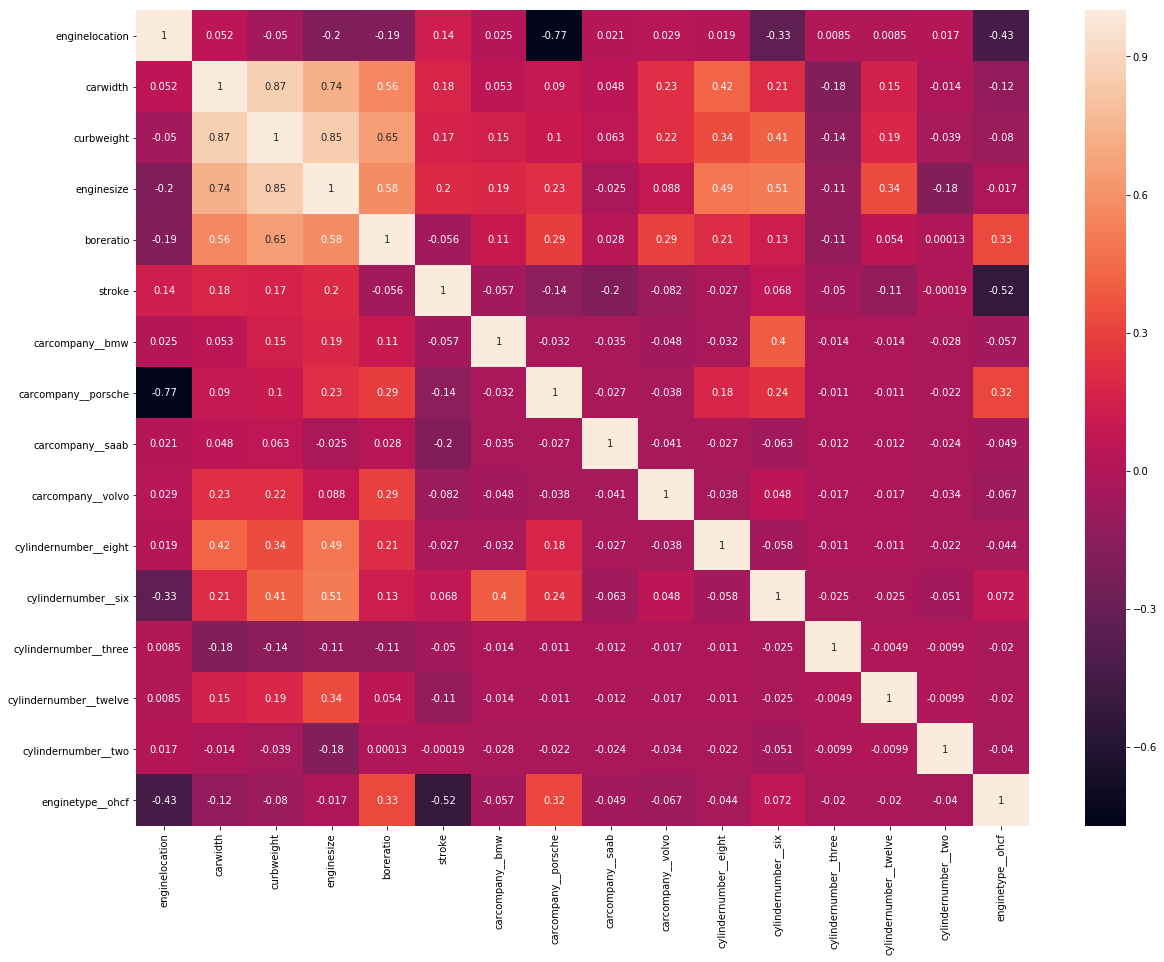

In [313]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,15))     # Size of the figure
car_corr = car[[
'enginelocation',
'carwidth',
'curbweight',
'enginesize',
'boreratio',
'stroke',
'carcompany__bmw',
'carcompany__porsche',
'carcompany__saab',
'carcompany__volvo',
'cylindernumber__eight',
'cylindernumber__six',
'cylindernumber__three',
'cylindernumber__twelve',
'cylindernumber__two',
'enginetype__ohcf']]
sns.heatmap(car_corr.corr(),annot = True)

# Model 17 - Drop 'enginetype__ohcf' as p-value is 0.019 and it is the only variable left for enginetype

In [314]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop(['enginetype__ohcf'], 1)
# Create fitted model
lm_17 = sm.OLS(y_train,X_train_rfe).fit()
#summary of linear model
print(lm_17.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     138.5
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           5.52e-71
Time:                        23:26:05   Log-Likelihood:                 236.28
No. Observations:                 143   AIC:                            -440.6
Df Residuals:                     127   BIC:                            -393.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [315]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'aspiration', 'doornumber', 'carheight', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'carcompany__alfa-romero',
       'carcompany__audi', 'carcompany__buick', 'carcompany__chevrolet',
       'carcompany__dodge', 'carcompany__honda', 'carcompany__isuzu',
       'carcompany__jaguar', 'carcompany__mazda', 'carcompany__mercury',
       'carcompany__mitsubishi', 'carcompany__nissan', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__toyota', 'carcompany__volkswagen',
       'fuelsystem__mfi', 'fuelsystem__spfi', 'cylindernumber__five',
       'cylindernumber__four', 'enginetype__dohc', 'enginetype__dohcv',
       'enginetype__l', 'enginetype__ohc', 'enginetype__ohcv',
       'carbody__hardtop', 'carbody__hatchback', 'carbody__sedan',
       'carbody__wagon', 'drivewheel__4wd', 'drivewheel__fwd',
       'drivewheel__rwd','fuelsystem__2bbl','fuelsystem__1bbl','fuelsystem__4bbl','fuelsystem__mpfi',
        'fuelsystem__spdi','fuelsystem__idi','compressionratio','fueltype','wheelbase',
        'carlength','carcompany__peugeot','carcompany__subaru','enginetype__rotor','carbody__convertible',
        'enginetype__ohcf'], axis=1), dependent_col="price")

Var    Vif
3               enginesize  20.69
2               curbweight   9.40
1                 carwidth   5.22
11     cylindernumber__six   4.34
10   cylindernumber__eight   4.05
4                boreratio   3.65
0           enginelocation   3.38
7      carcompany__porsche   3.25
13  cylindernumber__twelve   2.82
5                   stroke   1.90
14     cylindernumber__two   1.45
6          carcompany__bmw   1.30
9        carcompany__volvo   1.26
8         carcompany__saab   1.11
12   cylindernumber__three   1.05

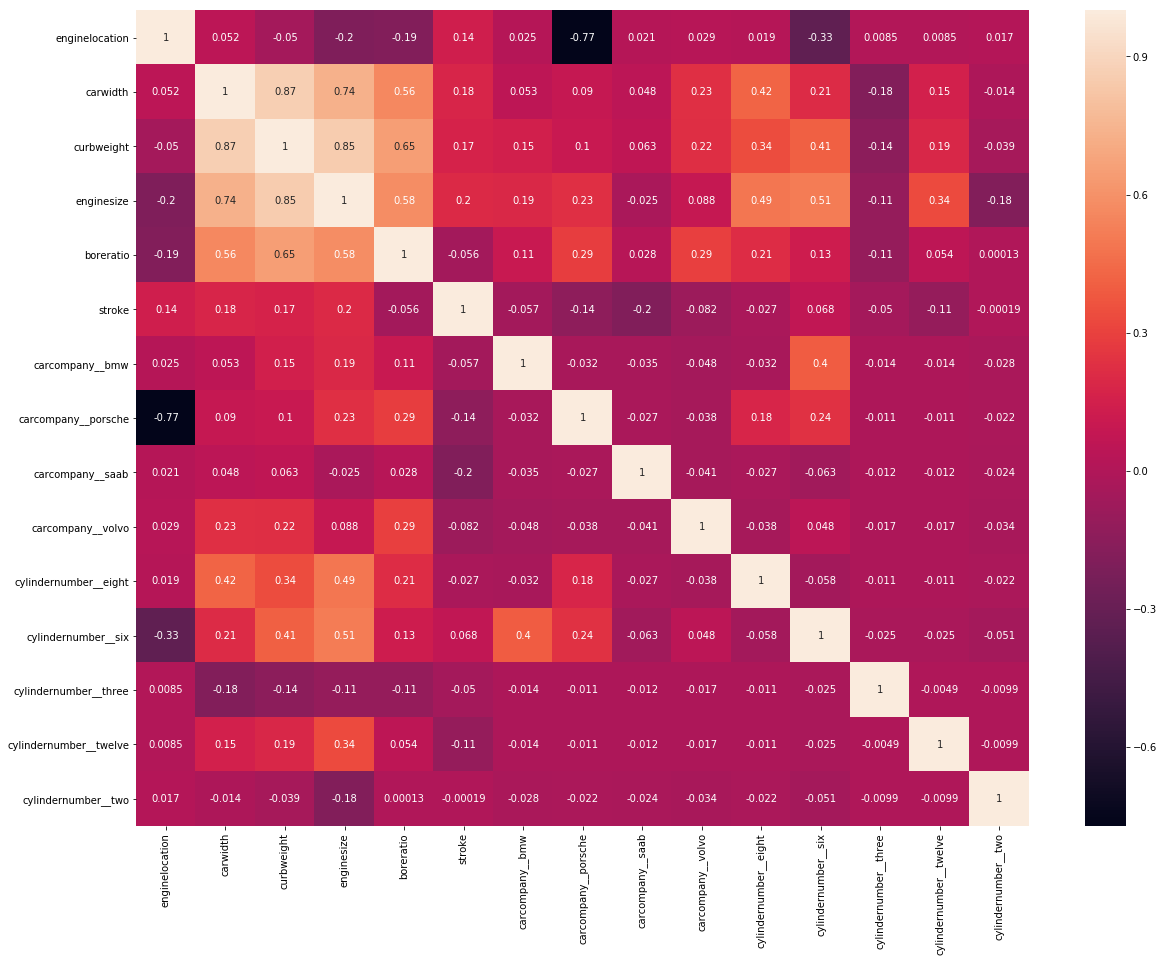

In [316]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,15))     # Size of the figure
car_corr = car[[
'enginelocation',
'carwidth',
'curbweight',
'enginesize',
'boreratio',
'stroke',
'carcompany__bmw',
'carcompany__porsche',
'carcompany__saab',
'carcompany__volvo',
'cylindernumber__eight',
'cylindernumber__six',
'cylindernumber__three',
'cylindernumber__twelve',
'cylindernumber__two'
]]
sns.heatmap(car_corr.corr(),annot = True)

# Model 18 - Drop 'curbweight' as p-value is 0.002 which is acceptable but has high correlation with 3 other variables and has high VIF

In [317]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop(['curbweight'], 1)
# Create fitted model
lm_18 = sm.OLS(y_train,X_train_rfe).fit()
#summary of linear model
print(lm_18.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     138.1
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           5.11e-70
Time:                        23:26:10   Log-Likelihood:                 230.95
No. Observations:                 143   AIC:                            -431.9
Df Residuals:                     128   BIC:                            -387.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [318]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'aspiration', 'doornumber', 'carheight', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'carcompany__alfa-romero',
       'carcompany__audi', 'carcompany__buick', 'carcompany__chevrolet',
       'carcompany__dodge', 'carcompany__honda', 'carcompany__isuzu',
       'carcompany__jaguar', 'carcompany__mazda', 'carcompany__mercury',
       'carcompany__mitsubishi', 'carcompany__nissan', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__toyota', 'carcompany__volkswagen',
       'fuelsystem__mfi', 'fuelsystem__spfi', 'cylindernumber__five',
       'cylindernumber__four', 'enginetype__dohc', 'enginetype__dohcv',
       'enginetype__l', 'enginetype__ohc', 'enginetype__ohcv',
       'carbody__hardtop', 'carbody__hatchback', 'carbody__sedan',
       'carbody__wagon', 'drivewheel__4wd', 'drivewheel__fwd',
       'drivewheel__rwd','fuelsystem__2bbl','fuelsystem__1bbl','fuelsystem__4bbl','fuelsystem__mpfi',
        'fuelsystem__spdi','fuelsystem__idi','compressionratio','fueltype','wheelbase',
        'carlength','carcompany__peugeot','carcompany__subaru','enginetype__rotor','carbody__convertible',
        'enginetype__ohcf','curbweight'], axis=1), dependent_col="price")

Var    Vif
2               enginesize  16.40
10     cylindernumber__six   4.34
9    cylindernumber__eight   3.73
3                boreratio   3.61
1                 carwidth   3.37
0           enginelocation   3.36
6      carcompany__porsche   3.22
12  cylindernumber__twelve   2.69
4                   stroke   1.86
13     cylindernumber__two   1.38
5          carcompany__bmw   1.30
8        carcompany__volvo   1.26
7         carcompany__saab   1.10
11   cylindernumber__three   1.05

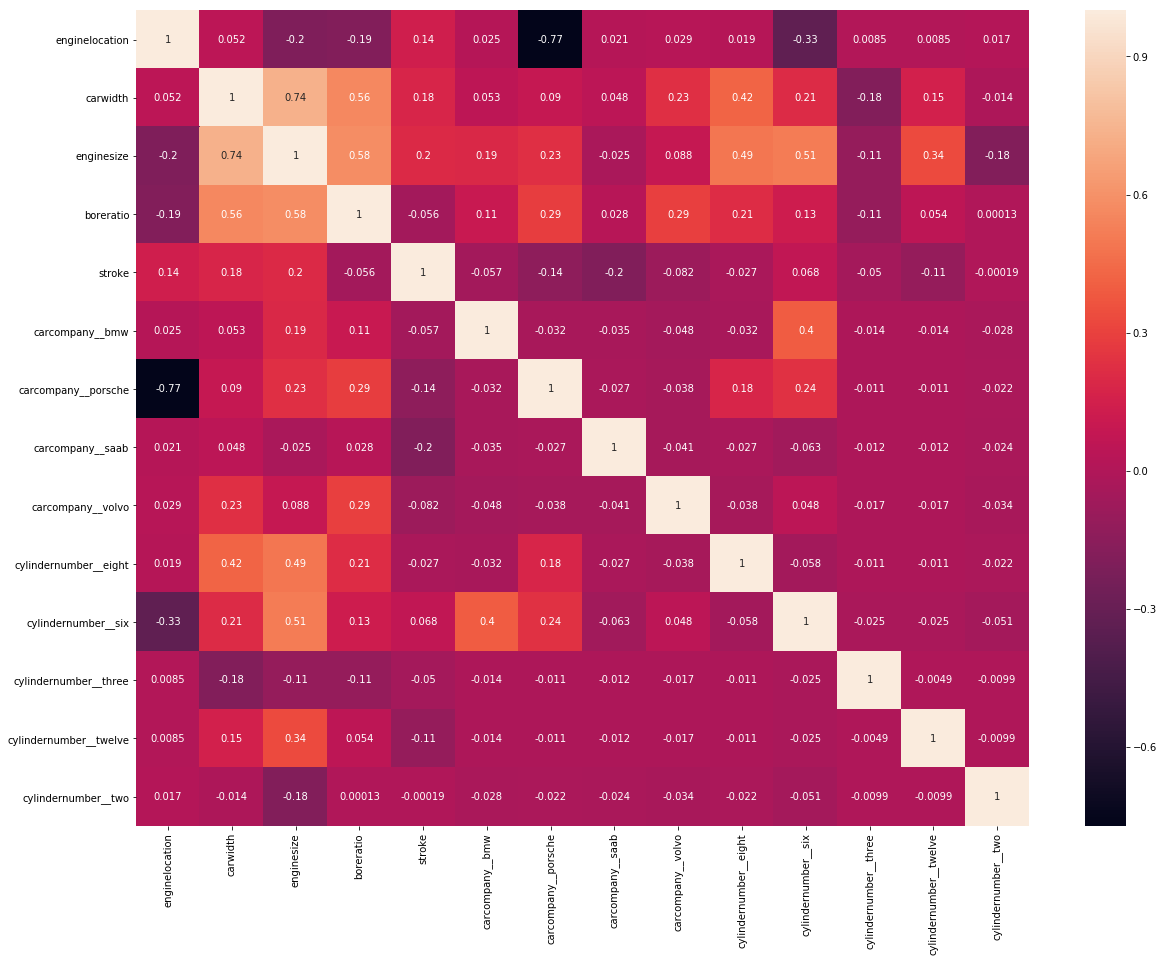

In [319]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,15))     # Size of the figure
car_corr = car[[
'enginelocation',
'carwidth',
'enginesize',
'boreratio',
'stroke',
'carcompany__bmw',
'carcompany__porsche',
'carcompany__saab',
'carcompany__volvo',
'cylindernumber__eight',
'cylindernumber__six',
'cylindernumber__three',
'cylindernumber__twelve',
'cylindernumber__two'
]]
sns.heatmap(car_corr.corr(),annot = True)

# Model 19 - Drop 'cylindernumber__six' as VIF is high and there are multiple cylindernumber variables

In [320]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop(['cylindernumber__six'], 1)
# Create fitted model
lm_19 = sm.OLS(y_train,X_train_rfe).fit()
#summary of linear model
print(lm_19.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     106.5
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           2.65e-62
Time:                        23:26:13   Log-Likelihood:                 208.30
No. Observations:                 143   AIC:                            -388.6
Df Residuals:                     129   BIC:                            -347.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [321]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'aspiration', 'doornumber', 'carheight', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'carcompany__alfa-romero',
       'carcompany__audi', 'carcompany__buick', 'carcompany__chevrolet',
       'carcompany__dodge', 'carcompany__honda', 'carcompany__isuzu',
       'carcompany__jaguar', 'carcompany__mazda', 'carcompany__mercury',
       'carcompany__mitsubishi', 'carcompany__nissan', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__toyota', 'carcompany__volkswagen',
       'fuelsystem__mfi', 'fuelsystem__spfi', 'cylindernumber__five',
       'cylindernumber__four', 'enginetype__dohc', 'enginetype__dohcv',
       'enginetype__l', 'enginetype__ohc', 'enginetype__ohcv',
       'carbody__hardtop', 'carbody__hatchback', 'carbody__sedan',
       'carbody__wagon', 'drivewheel__4wd', 'drivewheel__fwd',
       'drivewheel__rwd','fuelsystem__2bbl','fuelsystem__1bbl','fuelsystem__4bbl','fuelsystem__mpfi',
        'fuelsystem__spdi','fuelsystem__idi','compressionratio','fueltype','wheelbase',
        'carlength','carcompany__peugeot','carcompany__subaru','enginetype__rotor','carbody__convertible',
        'enginetype__ohcf','curbweight','cylindernumber__six'], axis=1), dependent_col="price")

Var   Vif
2               enginesize  5.96
0           enginelocation  3.32
1                 carwidth  3.08
6      carcompany__porsche  3.00
3                boreratio  2.18
9    cylindernumber__eight  1.98
11  cylindernumber__twelve  1.58
4                   stroke  1.52
5          carcompany__bmw  1.21
8        carcompany__volvo  1.21
12     cylindernumber__two  1.17
7         carcompany__saab  1.08
10   cylindernumber__three  1.04

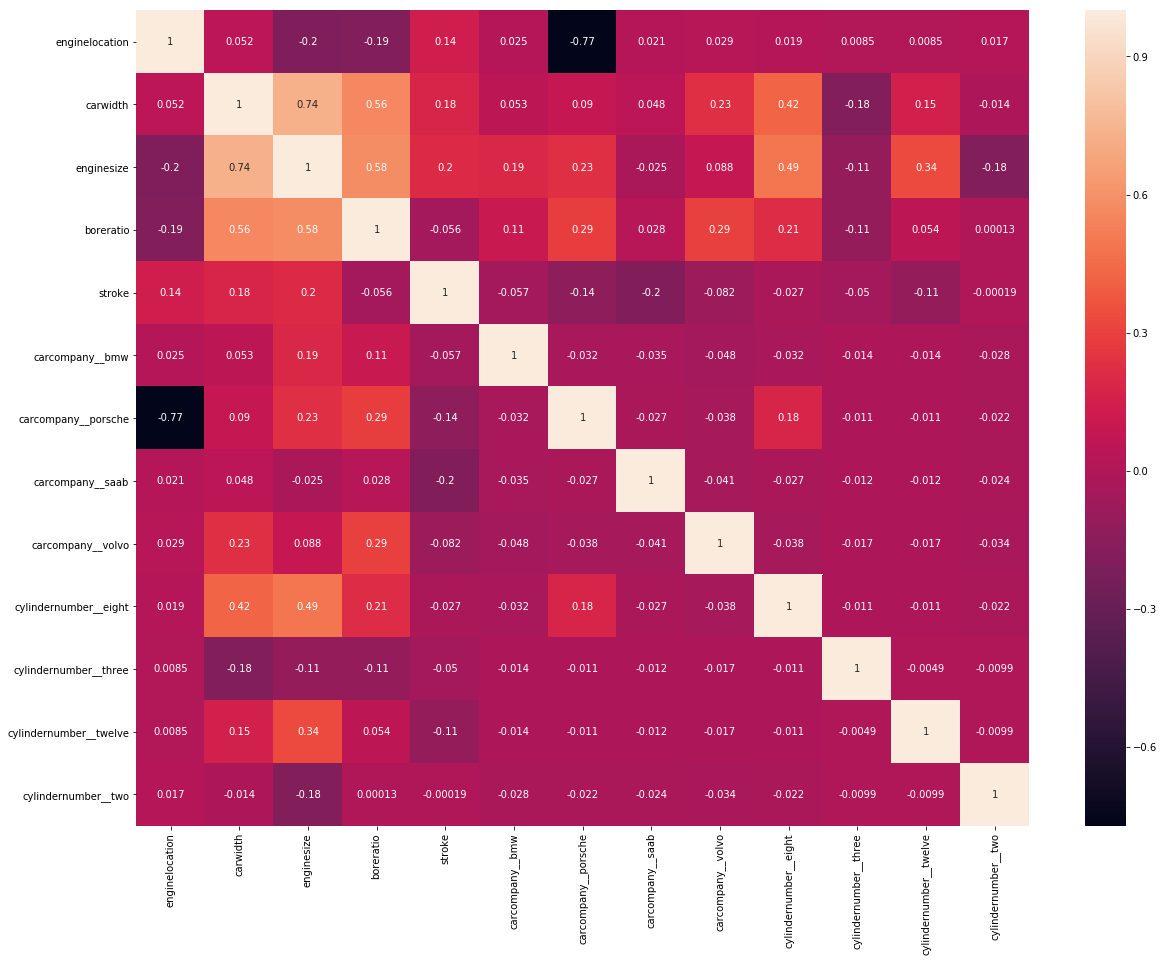

In [322]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,15))     # Size of the figure
car_corr = car[[
'enginelocation',
'carwidth',
'enginesize',
'boreratio',
'stroke',
'carcompany__bmw',
'carcompany__porsche',
'carcompany__saab',
'carcompany__volvo',
'cylindernumber__eight',
'cylindernumber__three',
'cylindernumber__twelve',
'cylindernumber__two'
]]
sns.heatmap(car_corr.corr(),annot = True)

# The Adjusted R2 Value has now dropped from .931 to .906

# Model 20 - Drop 'cylindernumber__eight' as p-value is 0.470


In [323]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop(['cylindernumber__eight'], 1)
# Create fitted model
lm_20 = sm.OLS(y_train,X_train_rfe).fit()
#summary of linear model
print(lm_20.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     115.8
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           3.12e-63
Time:                        23:26:17   Log-Likelihood:                 208.01
No. Observations:                 143   AIC:                            -390.0
Df Residuals:                     130   BIC:                            -351.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [324]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'aspiration', 'doornumber', 'carheight', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'carcompany__alfa-romero',
       'carcompany__audi', 'carcompany__buick', 'carcompany__chevrolet',
       'carcompany__dodge', 'carcompany__honda', 'carcompany__isuzu',
       'carcompany__jaguar', 'carcompany__mazda', 'carcompany__mercury',
       'carcompany__mitsubishi', 'carcompany__nissan', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__toyota', 'carcompany__volkswagen',
       'fuelsystem__mfi', 'fuelsystem__spfi', 'cylindernumber__five',
       'cylindernumber__four', 'enginetype__dohc', 'enginetype__dohcv',
       'enginetype__l', 'enginetype__ohc', 'enginetype__ohcv',
       'carbody__hardtop', 'carbody__hatchback', 'carbody__sedan',
       'carbody__wagon', 'drivewheel__4wd', 'drivewheel__fwd',
       'drivewheel__rwd','fuelsystem__2bbl','fuelsystem__1bbl','fuelsystem__4bbl','fuelsystem__mpfi',
        'fuelsystem__spdi','fuelsystem__idi','compressionratio','fueltype','wheelbase',
        'carlength','carcompany__peugeot','carcompany__subaru','enginetype__rotor','carbody__convertible',
        'enginetype__ohcf','curbweight','cylindernumber__six','cylindernumber__eight'], axis=1), dependent_col="price")

Var   Vif
2               enginesize  4.21
1                 carwidth  3.08
0           enginelocation  2.84
6      carcompany__porsche  2.72
3                boreratio  2.01
10  cylindernumber__twelve  1.34
4                   stroke  1.32
8        carcompany__volvo  1.20
5          carcompany__bmw  1.13
11     cylindernumber__two  1.13
7         carcompany__saab  1.07
9    cylindernumber__three  1.04

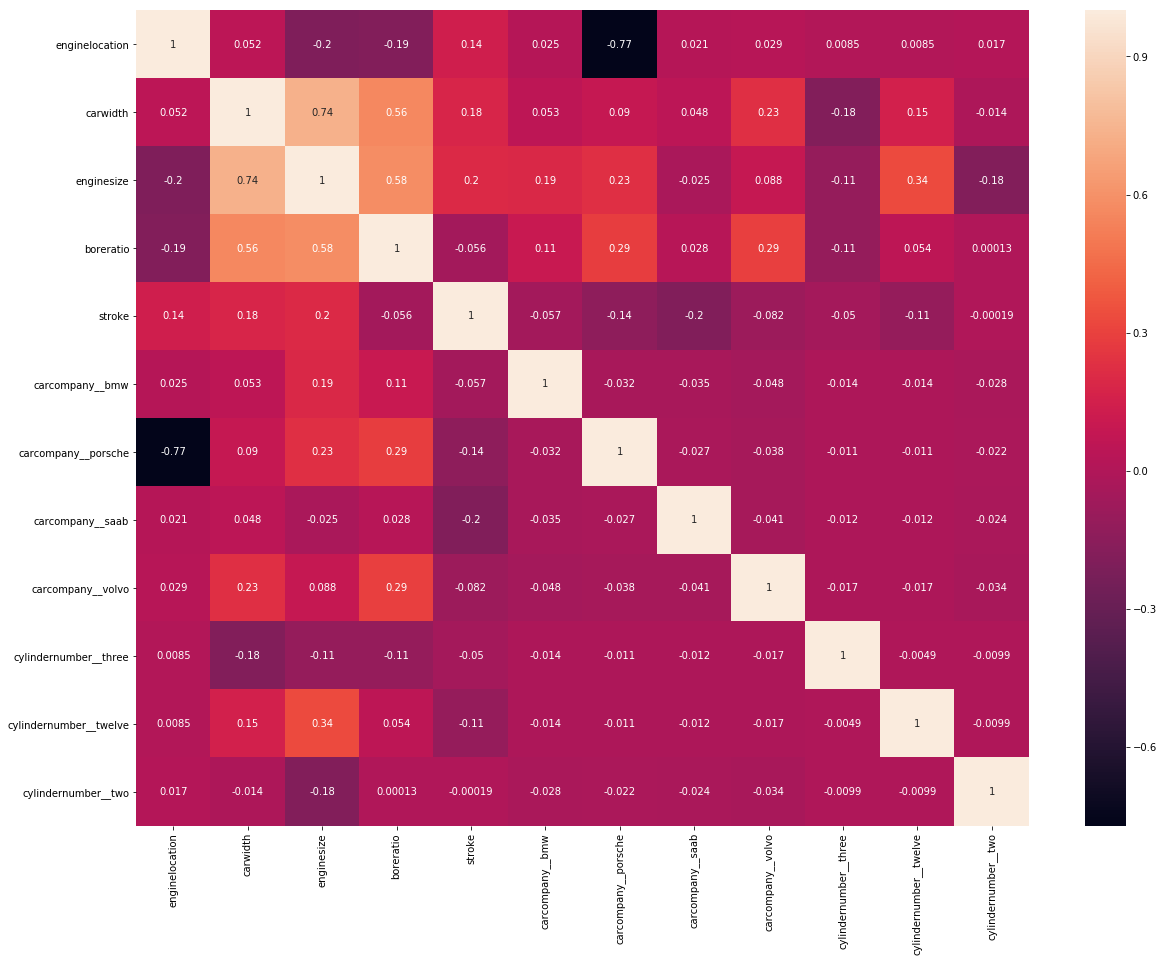

In [325]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,15))     # Size of the figure
car_corr = car[[
'enginelocation',
'carwidth',
'enginesize',
'boreratio',
'stroke',
'carcompany__bmw',
'carcompany__porsche',
'carcompany__saab',
'carcompany__volvo',
'cylindernumber__three',
'cylindernumber__twelve',
'cylindernumber__two'
]]
sns.heatmap(car_corr.corr(),annot = True)

# Adjusted R-Squared value has improved  to .907

# Model 21 - Drop 'carcompany__volvo' as p-value is 0.31

In [326]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop(['carcompany__volvo'], 1)
# Create fitted model
lm_21 = sm.OLS(y_train,X_train_rfe).fit()
#summary of linear model
print(lm_21.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     122.4
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           2.78e-63
Time:                        23:26:20   Log-Likelihood:                 205.45
No. Observations:                 143   AIC:                            -386.9
Df Residuals:                     131   BIC:                            -351.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [327]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'aspiration', 'doornumber', 'carheight', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'carcompany__alfa-romero',
       'carcompany__audi', 'carcompany__buick', 'carcompany__chevrolet',
       'carcompany__dodge', 'carcompany__honda', 'carcompany__isuzu',
       'carcompany__jaguar', 'carcompany__mazda', 'carcompany__mercury',
       'carcompany__mitsubishi', 'carcompany__nissan', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__toyota', 'carcompany__volkswagen',
       'fuelsystem__mfi', 'fuelsystem__spfi', 'cylindernumber__five',
       'cylindernumber__four', 'enginetype__dohc', 'enginetype__dohcv',
       'enginetype__l', 'enginetype__ohc', 'enginetype__ohcv',
       'carbody__hardtop', 'carbody__hatchback', 'carbody__sedan',
       'carbody__wagon', 'drivewheel__4wd', 'drivewheel__fwd',
       'drivewheel__rwd','fuelsystem__2bbl','fuelsystem__1bbl','fuelsystem__4bbl','fuelsystem__mpfi',
        'fuelsystem__spdi','fuelsystem__idi','compressionratio','fueltype','wheelbase',
        'carlength','carcompany__peugeot','carcompany__subaru','enginetype__rotor','carbody__convertible',
        'enginetype__ohcf','curbweight','cylindernumber__six','cylindernumber__eight','carcompany__volvo'], axis=1), dependent_col="price")

Var   Vif
2               enginesize  4.09
1                 carwidth  2.95
0           enginelocation  2.82
6      carcompany__porsche  2.66
3                boreratio  1.87
9   cylindernumber__twelve  1.34
4                   stroke  1.31
5          carcompany__bmw  1.12
10     cylindernumber__two  1.12
7         carcompany__saab  1.06
8    cylindernumber__three  1.04

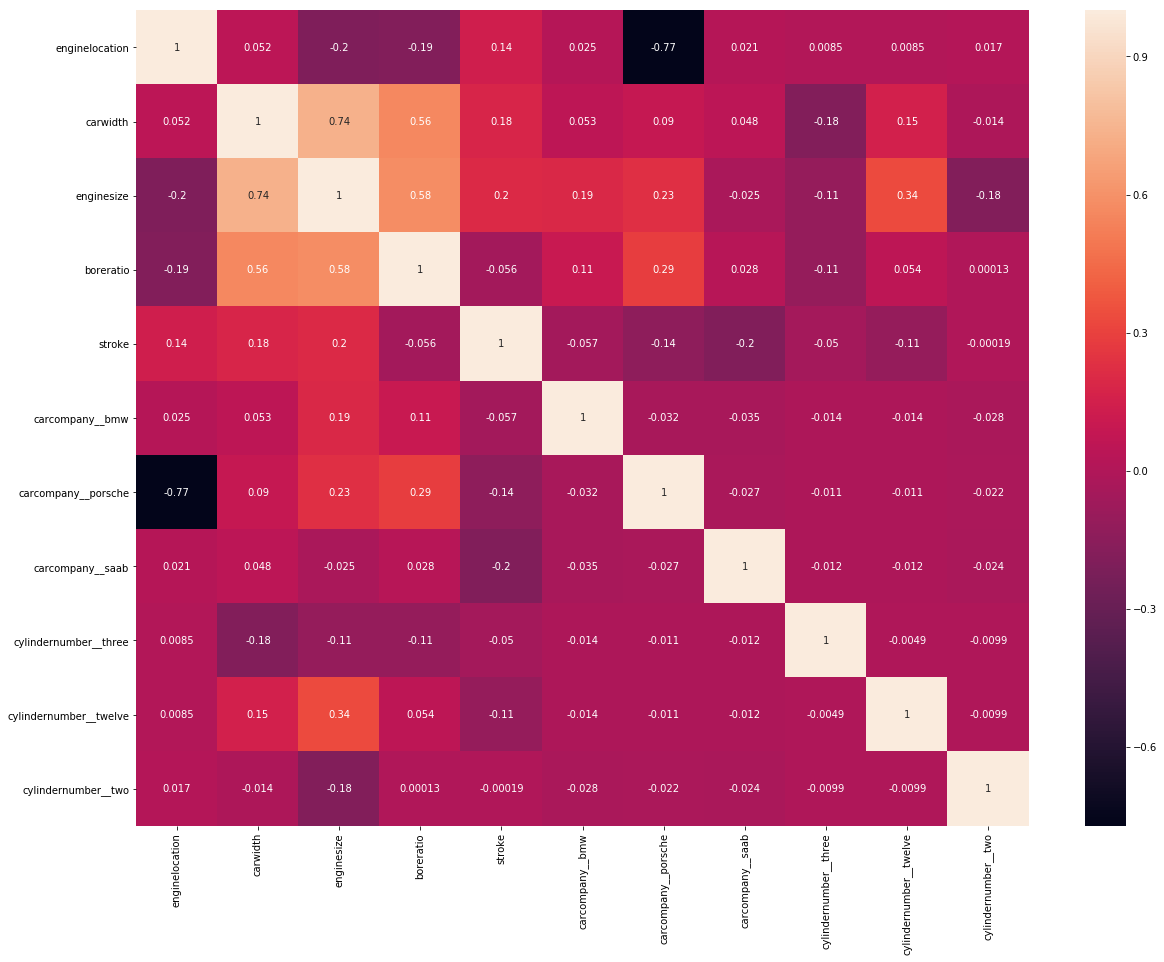

In [328]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,15))     # Size of the figure
car_corr = car[[
'enginelocation',
'carwidth',
'enginesize',
'boreratio',
'stroke',
'carcompany__bmw',
'carcompany__porsche',
'carcompany__saab',
'cylindernumber__three',
'cylindernumber__twelve',
'cylindernumber__two'
]]
sns.heatmap(car_corr.corr(),annot = True)

# Adjusted R-Squared value has dropped from .907 to  0.904

# Model 22 - Drop 'carcompany__porsche' as p-value is 0.47

In [329]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop(['carcompany__porsche'], 1)
# Create fitted model
lm_22 = sm.OLS(y_train,X_train_rfe).fit()
#summary of linear model
print(lm_22.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     131.2
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           1.68e-63
Time:                        23:26:23   Log-Likelihood:                 203.29
No. Observations:                 143   AIC:                            -384.6
Df Residuals:                     132   BIC:                            -352.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [330]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'aspiration', 'doornumber', 'carheight', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'carcompany__alfa-romero',
       'carcompany__audi', 'carcompany__buick', 'carcompany__chevrolet',
       'carcompany__dodge', 'carcompany__honda', 'carcompany__isuzu',
       'carcompany__jaguar', 'carcompany__mazda', 'carcompany__mercury',
       'carcompany__mitsubishi', 'carcompany__nissan', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__toyota', 'carcompany__volkswagen',
       'fuelsystem__mfi', 'fuelsystem__spfi', 'cylindernumber__five',
       'cylindernumber__four', 'enginetype__dohc', 'enginetype__dohcv',
       'enginetype__l', 'enginetype__ohc', 'enginetype__ohcv',
       'carbody__hardtop', 'carbody__hatchback', 'carbody__sedan',
       'carbody__wagon', 'drivewheel__4wd', 'drivewheel__fwd',
       'drivewheel__rwd','fuelsystem__2bbl','fuelsystem__1bbl','fuelsystem__4bbl','fuelsystem__mpfi',
        'fuelsystem__spdi','fuelsystem__idi','compressionratio','fueltype','wheelbase',
        'carlength','carcompany__peugeot','carcompany__subaru','enginetype__rotor','carbody__convertible',
        'enginetype__ohcf','curbweight','cylindernumber__six','cylindernumber__eight','carcompany__volvo',
        'carcompany__porsche'], axis=1), dependent_col="price")

Var   Vif
2              enginesize  4.08
1                carwidth  2.90
3               boreratio  1.83
8  cylindernumber__twelve  1.34
4                  stroke  1.31
0          enginelocation  1.27
5         carcompany__bmw  1.12
9     cylindernumber__two  1.12
6        carcompany__saab  1.06
7   cylindernumber__three  1.04

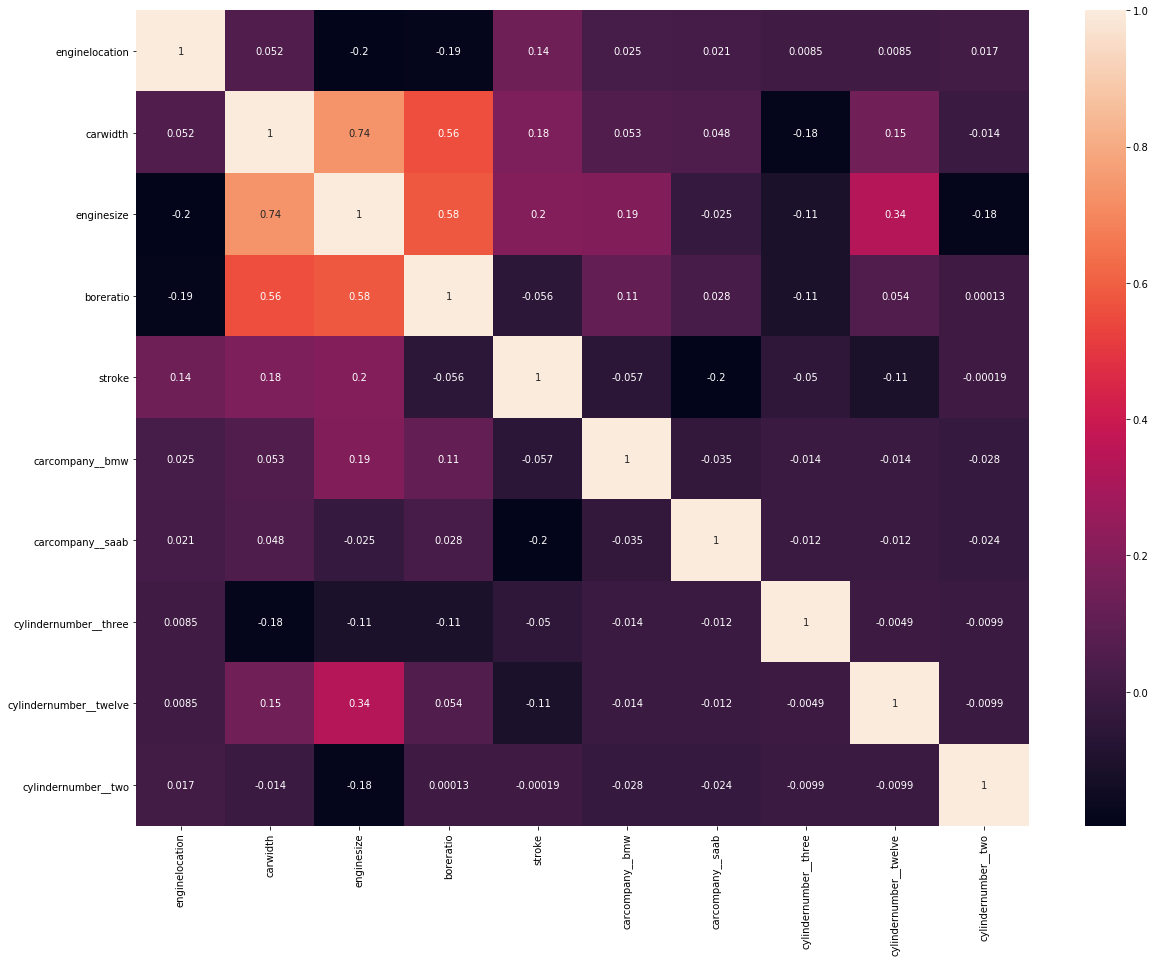

In [331]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,15))     # Size of the figure
car_corr = car[[
'enginelocation',
'carwidth',
'enginesize',
'boreratio',
'stroke',
'carcompany__bmw',
'carcompany__saab',
'cylindernumber__three',
'cylindernumber__twelve',
'cylindernumber__two'
]]
sns.heatmap(car_corr.corr(),annot = True)

# Adjusted R-Squared value has dropped from .904 to 0.902

# Model 23 - Drop 'carcompany__saab ' as p-value is 0.50

In [332]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop(['carcompany__saab'], 1)
# Create fitted model
lm_23 = sm.OLS(y_train,X_train_rfe).fit()
#summary of linear model
print(lm_23.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     142.2
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           9.26e-64
Time:                        23:26:25   Log-Likelihood:                 201.21
No. Observations:                 143   AIC:                            -382.4
Df Residuals:                     133   BIC:                            -352.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [333]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'aspiration', 'doornumber', 'carheight', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'carcompany__alfa-romero',
       'carcompany__audi', 'carcompany__buick', 'carcompany__chevrolet',
       'carcompany__dodge', 'carcompany__honda', 'carcompany__isuzu',
       'carcompany__jaguar', 'carcompany__mazda', 'carcompany__mercury',
       'carcompany__mitsubishi', 'carcompany__nissan', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__toyota', 'carcompany__volkswagen',
       'fuelsystem__mfi', 'fuelsystem__spfi', 'cylindernumber__five',
       'cylindernumber__four', 'enginetype__dohc', 'enginetype__dohcv',
       'enginetype__l', 'enginetype__ohc', 'enginetype__ohcv',
       'carbody__hardtop', 'carbody__hatchback', 'carbody__sedan',
       'carbody__wagon', 'drivewheel__4wd', 'drivewheel__fwd',
       'drivewheel__rwd','fuelsystem__2bbl','fuelsystem__1bbl','fuelsystem__4bbl','fuelsystem__mpfi',
        'fuelsystem__spdi','fuelsystem__idi','compressionratio','fueltype','wheelbase',
        'carlength','carcompany__peugeot','carcompany__subaru','enginetype__rotor','carbody__convertible',
        'enginetype__ohcf','curbweight','cylindernumber__six','cylindernumber__eight','carcompany__volvo',
        'carcompany__porsche','carcompany__saab'], axis=1), dependent_col="price")

Var   Vif
2              enginesize  4.07
1                carwidth  2.88
3               boreratio  1.83
7  cylindernumber__twelve  1.33
0          enginelocation  1.27
4                  stroke  1.25
5         carcompany__bmw  1.12
8     cylindernumber__two  1.11
6   cylindernumber__three  1.04

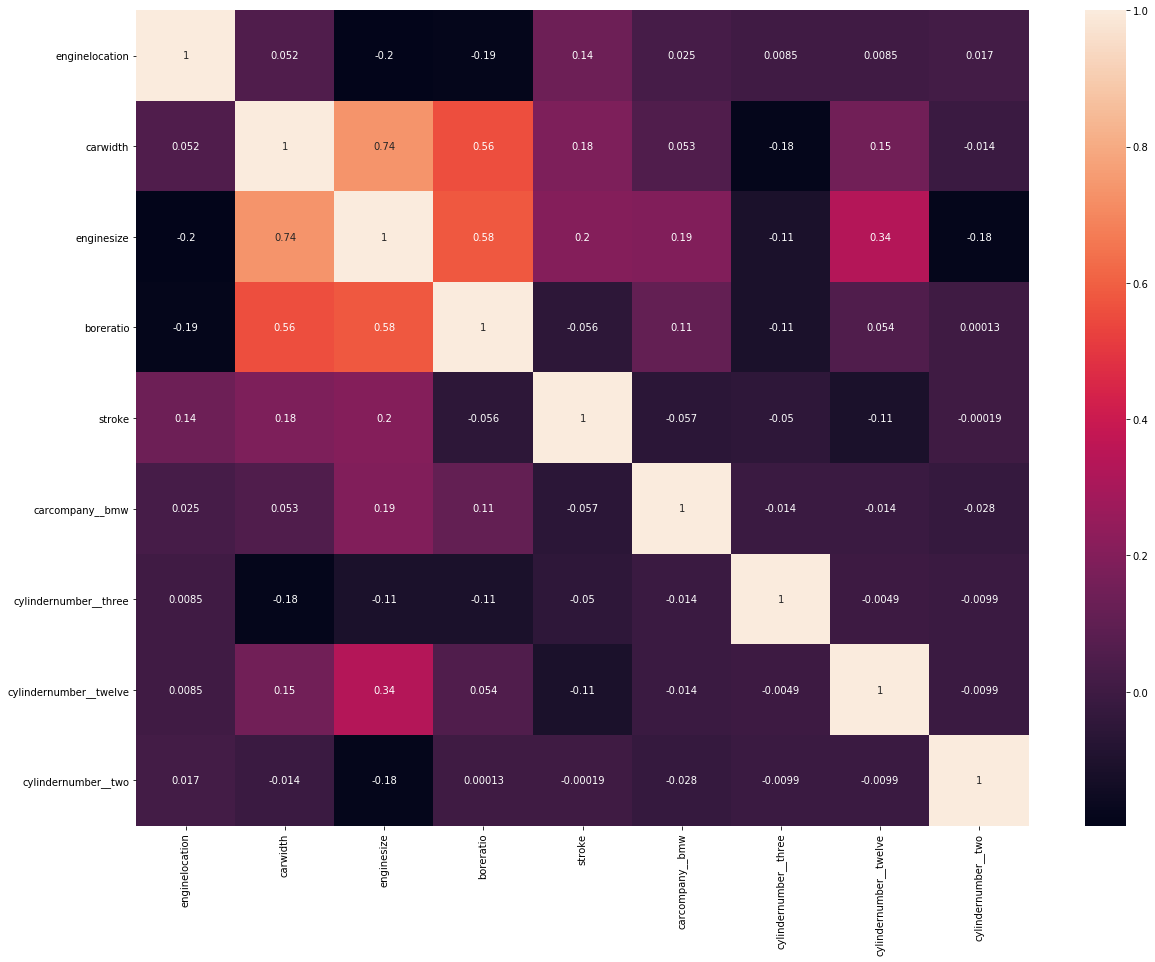

In [334]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,15))     # Size of the figure
car_corr = car[[
'enginelocation',
'carwidth',
'enginesize',
'boreratio',
'stroke',
'carcompany__bmw',
'cylindernumber__three',
'cylindernumber__twelve',
'cylindernumber__two'
]]
sns.heatmap(car_corr.corr(),annot = True)

# Adjusted R-Squared value has dropped from .902 to 0.900

# Model 24 - Drop 'boreratio' as  it has strong correlation with with two other variables - carwidth and enginesize

In [335]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop(['boreratio'], 1)
# Create fitted model
lm_24 = sm.OLS(y_train,X_train_rfe).fit()
#summary of linear model
print(lm_24.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     151.7
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           2.71e-63
Time:                        23:26:27   Log-Likelihood:                 197.30
No. Observations:                 143   AIC:                            -376.6
Df Residuals:                     134   BIC:                            -349.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [336]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'aspiration', 'doornumber', 'carheight', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'carcompany__alfa-romero',
       'carcompany__audi', 'carcompany__buick', 'carcompany__chevrolet',
       'carcompany__dodge', 'carcompany__honda', 'carcompany__isuzu',
       'carcompany__jaguar', 'carcompany__mazda', 'carcompany__mercury',
       'carcompany__mitsubishi', 'carcompany__nissan', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__toyota', 'carcompany__volkswagen',
       'fuelsystem__mfi', 'fuelsystem__spfi', 'cylindernumber__five',
       'cylindernumber__four', 'enginetype__dohc', 'enginetype__dohcv',
       'enginetype__l', 'enginetype__ohc', 'enginetype__ohcv',
       'carbody__hardtop', 'carbody__hatchback', 'carbody__sedan',
       'carbody__wagon', 'drivewheel__4wd', 'drivewheel__fwd',
       'drivewheel__rwd','fuelsystem__2bbl','fuelsystem__1bbl','fuelsystem__4bbl','fuelsystem__mpfi',
        'fuelsystem__spdi','fuelsystem__idi','compressionratio','fueltype','wheelbase',
        'carlength','carcompany__peugeot','carcompany__subaru','enginetype__rotor','carbody__convertible',
        'enginetype__ohcf','curbweight','cylindernumber__six','cylindernumber__eight','carcompany__volvo',
        'carcompany__porsche','carcompany__saab','boreratio'], axis=1), dependent_col="price")

Var   Vif
2              enginesize  3.62
1                carwidth  2.76
6  cylindernumber__twelve  1.28
0          enginelocation  1.26
3                  stroke  1.17
4         carcompany__bmw  1.12
7     cylindernumber__two  1.10
5   cylindernumber__three  1.04

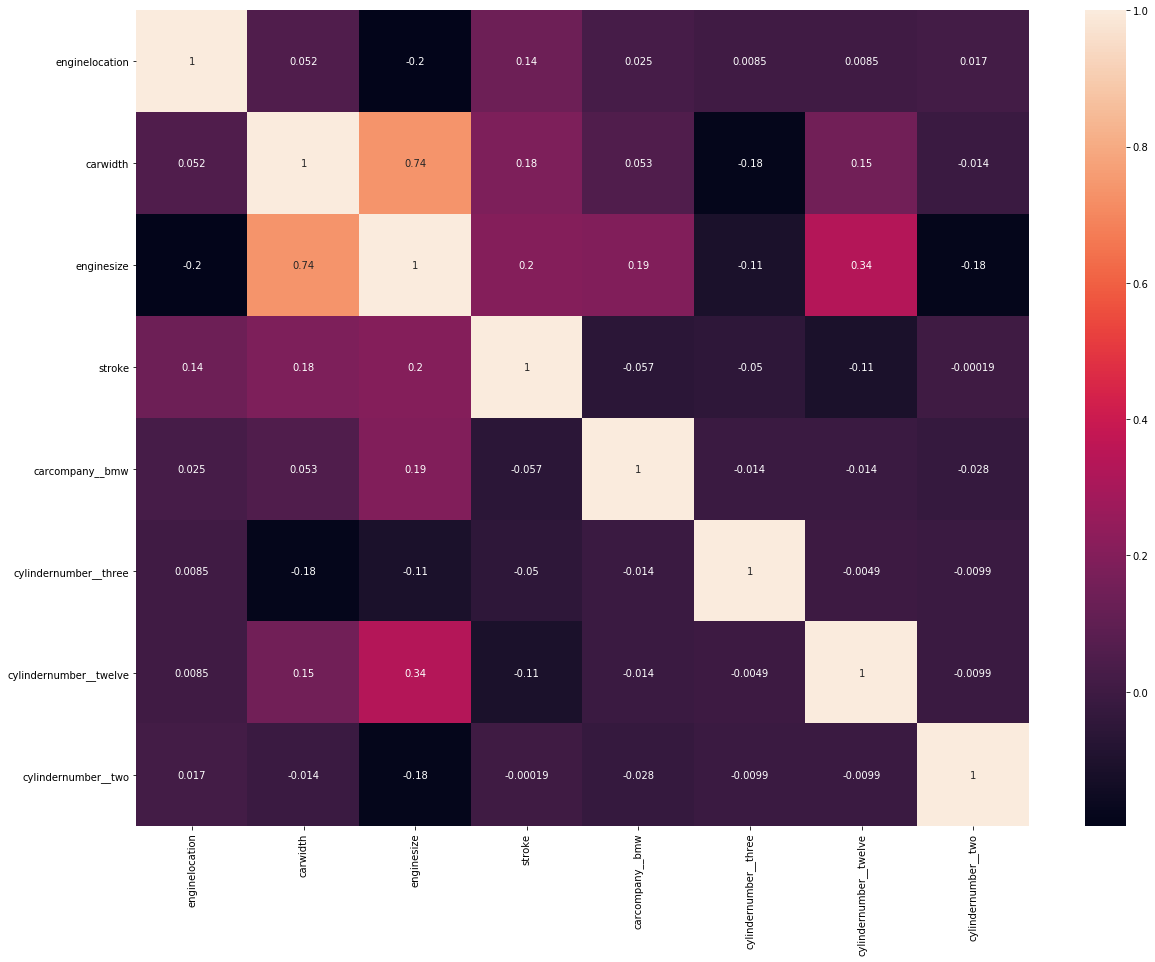

In [337]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,15))     # Size of the figure
car_corr = car[[
'enginelocation',
'carwidth',
'enginesize',
'stroke',
'carcompany__bmw',
'cylindernumber__three',
'cylindernumber__twelve',
'cylindernumber__two'
]]
sns.heatmap(car_corr.corr(),annot = True)

# Adjusted R-Squared value has dropped from .900 to 0.895

# Model 25 - Drop 'stroke' as it has ap-value of 0.083

In [338]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop(['stroke'], 1)
# Create fitted model
lm_25 = sm.OLS(y_train,X_train_rfe).fit()
#summary of linear model
print(lm_25.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     170.4
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           8.93e-64
Time:                        23:26:29   Log-Likelihood:                 195.69
No. Observations:                 143   AIC:                            -375.4
Df Residuals:                     135   BIC:                            -351.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [339]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'aspiration', 'doornumber', 'carheight', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'carcompany__alfa-romero',
       'carcompany__audi', 'carcompany__buick', 'carcompany__chevrolet',
       'carcompany__dodge', 'carcompany__honda', 'carcompany__isuzu',
       'carcompany__jaguar', 'carcompany__mazda', 'carcompany__mercury',
       'carcompany__mitsubishi', 'carcompany__nissan', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__toyota', 'carcompany__volkswagen',
       'fuelsystem__mfi', 'fuelsystem__spfi', 'cylindernumber__five',
       'cylindernumber__four', 'enginetype__dohc', 'enginetype__dohcv',
       'enginetype__l', 'enginetype__ohc', 'enginetype__ohcv',
       'carbody__hardtop', 'carbody__hatchback', 'carbody__sedan',
       'carbody__wagon', 'drivewheel__4wd', 'drivewheel__fwd',
       'drivewheel__rwd','fuelsystem__2bbl','fuelsystem__1bbl','fuelsystem__4bbl','fuelsystem__mpfi',
        'fuelsystem__spdi','fuelsystem__idi','compressionratio','fueltype','wheelbase',
        'carlength','carcompany__peugeot','carcompany__subaru','enginetype__rotor','carbody__convertible',
        'enginetype__ohcf','curbweight','cylindernumber__six','cylindernumber__eight','carcompany__volvo',
        'carcompany__porsche','carcompany__saab','boreratio','stroke'], axis=1), dependent_col="price")

Var   Vif
2              enginesize  3.35
1                carwidth  2.74
5  cylindernumber__twelve  1.20
0          enginelocation  1.19
3         carcompany__bmw  1.09
6     cylindernumber__two  1.09
4   cylindernumber__three  1.04

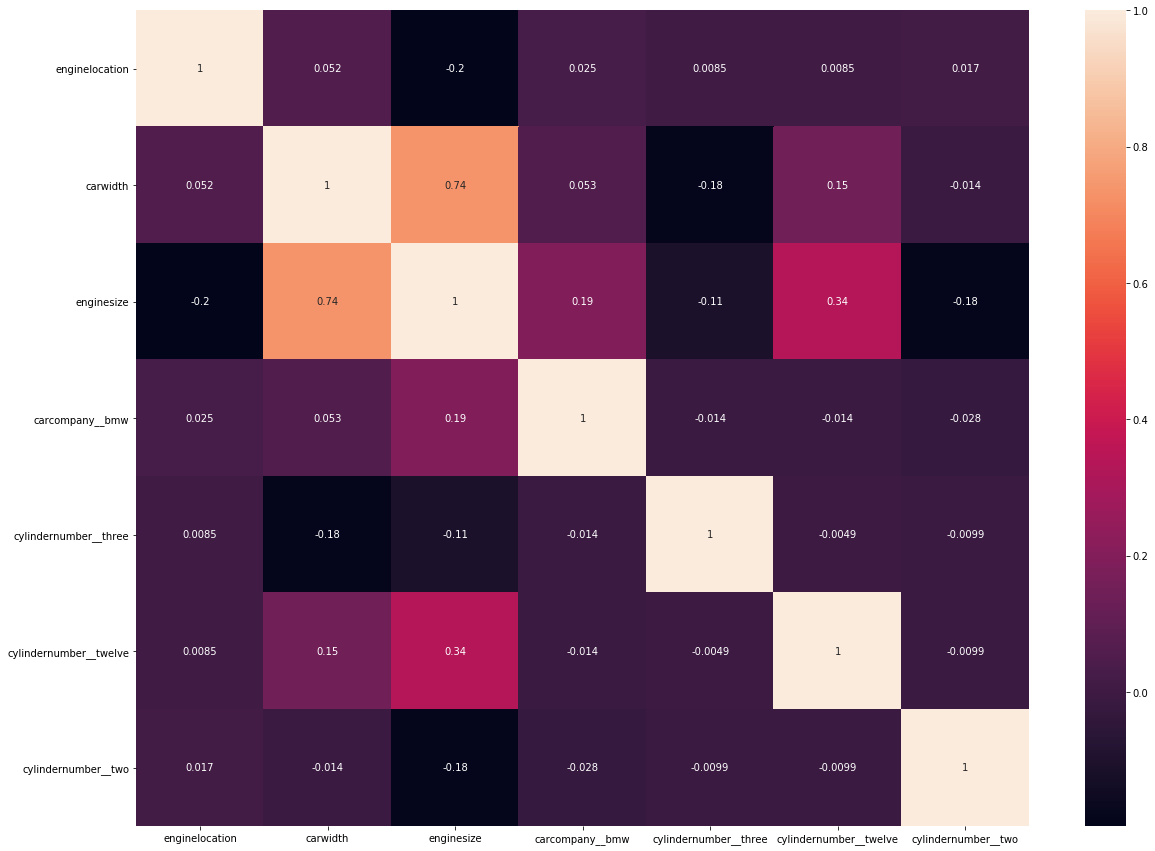

In [340]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,15))     # Size of the figure
car_corr = car[[
'enginelocation',
'carwidth',
'enginesize',
'carcompany__bmw',
'cylindernumber__three',
'cylindernumber__twelve',
'cylindernumber__two'
]]
sns.heatmap(car_corr.corr(),annot = True)

# Adjusted R-Squared value has dropped from .895 to 0.893

# Model 26 - Drop 'cylindernumber__twelve' as it has ap-value of 0.161

In [341]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop(['cylindernumber__twelve'], 1)
# Create fitted model
lm_26 = sm.OLS(y_train,X_train_rfe).fit()
#summary of linear model
print(lm_26.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     197.0
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           1.62e-64
Time:                        23:26:31   Log-Likelihood:                 194.64
No. Observations:                 143   AIC:                            -375.3
Df Residuals:                     136   BIC:                            -354.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

In [342]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'aspiration', 'doornumber', 'carheight', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'carcompany__alfa-romero',
       'carcompany__audi', 'carcompany__buick', 'carcompany__chevrolet',
       'carcompany__dodge', 'carcompany__honda', 'carcompany__isuzu',
       'carcompany__jaguar', 'carcompany__mazda', 'carcompany__mercury',
       'carcompany__mitsubishi', 'carcompany__nissan', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__toyota', 'carcompany__volkswagen',
       'fuelsystem__mfi', 'fuelsystem__spfi', 'cylindernumber__five',
       'cylindernumber__four', 'enginetype__dohc', 'enginetype__dohcv',
       'enginetype__l', 'enginetype__ohc', 'enginetype__ohcv',
       'carbody__hardtop', 'carbody__hatchback', 'carbody__sedan',
       'carbody__wagon', 'drivewheel__4wd', 'drivewheel__fwd',
       'drivewheel__rwd','fuelsystem__2bbl','fuelsystem__1bbl','fuelsystem__4bbl','fuelsystem__mpfi',
        'fuelsystem__spdi','fuelsystem__idi','compressionratio','fueltype','wheelbase',
        'carlength','carcompany__peugeot','carcompany__subaru','enginetype__rotor','carbody__convertible',
        'enginetype__ohcf','curbweight','cylindernumber__six','cylindernumber__eight','carcompany__volvo',
        'carcompany__porsche','carcompany__saab','boreratio','stroke',
        'cylindernumber__twelve'], axis=1), dependent_col="price")

Var   Vif
2             enginesize  2.86
1               carwidth  2.61
0         enginelocation  1.16
5    cylindernumber__two  1.08
3        carcompany__bmw  1.07
4  cylindernumber__three  1.04

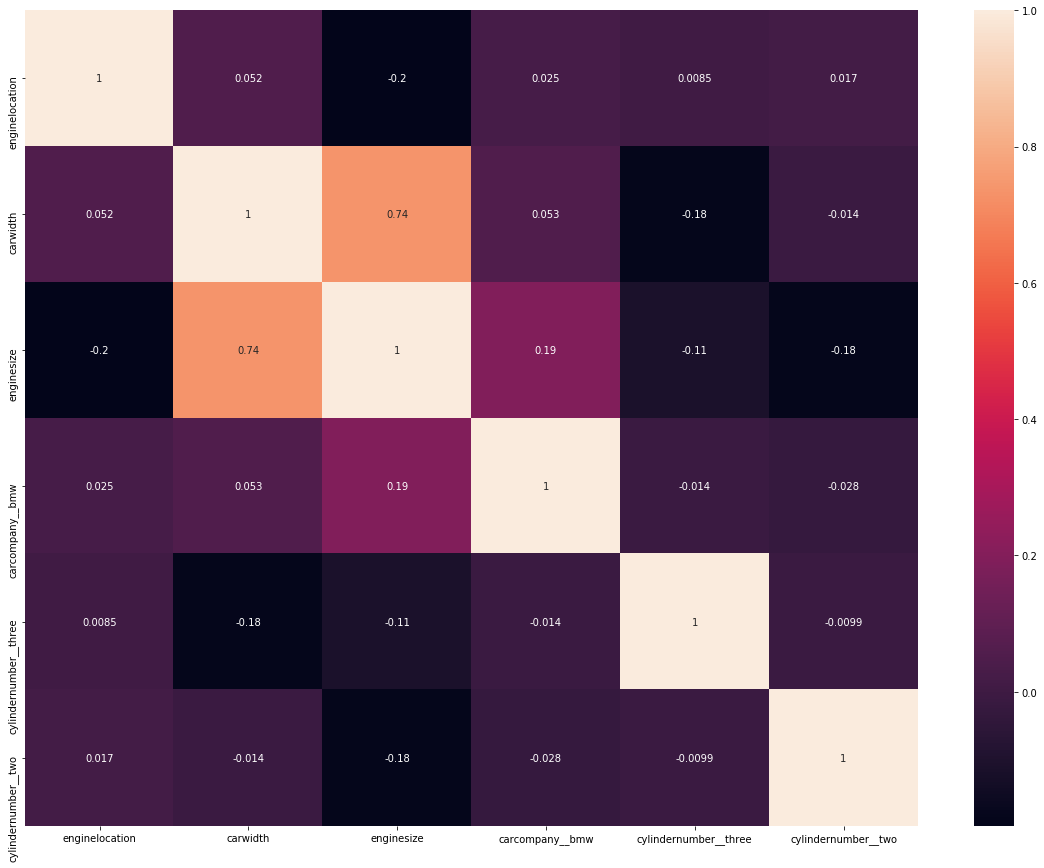

In [343]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,15))     # Size of the figure
car_corr = car[[
'enginelocation',
'carwidth',
'enginesize',
'carcompany__bmw',
'cylindernumber__three',
'cylindernumber__two'
]]
sns.heatmap(car_corr.corr(),annot = True)

# Adjusted R-Squared value has dropped from .893 to 0.892 which is not significant

# Model 27 - Drop 'cylindernumber__three' as we plan to select only 5 variables and this variable has a non 0.000 p-value

In [344]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop(['cylindernumber__three'], 1)
# Create fitted model
lm_27 = sm.OLS(y_train,X_train_rfe).fit()
#summary of linear model
print(lm_27.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     224.4
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           3.81e-64
Time:                        23:26:32   Log-Likelihood:                 190.83
No. Observations:                 143   AIC:                            -369.7
Df Residuals:                     137   BIC:                            -351.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0028    

In [345]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'aspiration', 'doornumber', 'carheight', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'carcompany__alfa-romero',
       'carcompany__audi', 'carcompany__buick', 'carcompany__chevrolet',
       'carcompany__dodge', 'carcompany__honda', 'carcompany__isuzu',
       'carcompany__jaguar', 'carcompany__mazda', 'carcompany__mercury',
       'carcompany__mitsubishi', 'carcompany__nissan', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__toyota', 'carcompany__volkswagen',
       'fuelsystem__mfi', 'fuelsystem__spfi', 'cylindernumber__five',
       'cylindernumber__four', 'enginetype__dohc', 'enginetype__dohcv',
       'enginetype__l', 'enginetype__ohc', 'enginetype__ohcv',
       'carbody__hardtop', 'carbody__hatchback', 'carbody__sedan',
       'carbody__wagon', 'drivewheel__4wd', 'drivewheel__fwd',
       'drivewheel__rwd','fuelsystem__2bbl','fuelsystem__1bbl','fuelsystem__4bbl','fuelsystem__mpfi',
        'fuelsystem__spdi','fuelsystem__idi','compressionratio','fueltype','wheelbase',
        'carlength','carcompany__peugeot','carcompany__subaru','enginetype__rotor','carbody__convertible',
        'enginetype__ohcf','curbweight','cylindernumber__six','cylindernumber__eight','carcompany__volvo',
        'carcompany__porsche','carcompany__saab','boreratio','stroke',
        'cylindernumber__twelve','cylindernumber__three'], axis=1), dependent_col="price")

Var   Vif
2           enginesize  2.85
1             carwidth  2.55
0       enginelocation  1.16
4  cylindernumber__two  1.08
3      carcompany__bmw  1.07

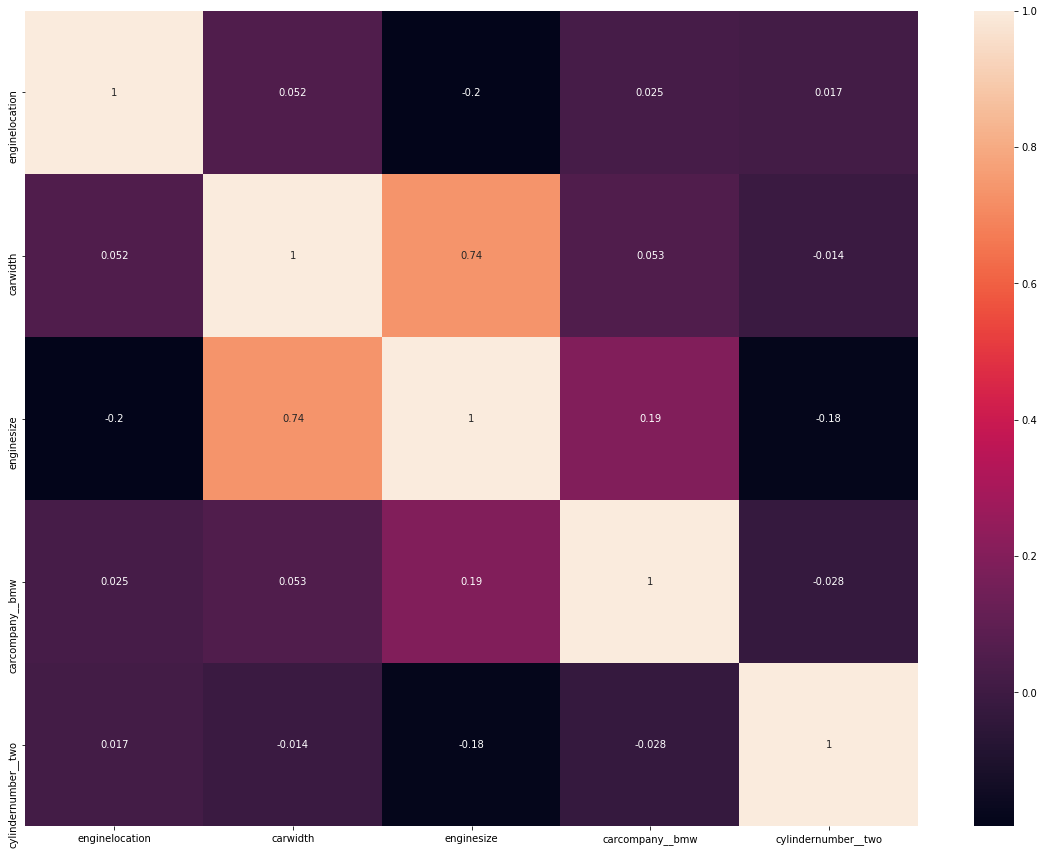

In [346]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,15))     # Size of the figure
car_corr = car[[
'enginelocation',
'carwidth',
'enginesize',
'carcompany__bmw',
'cylindernumber__two'
]]
sns.heatmap(car_corr.corr(),annot = True)

# Adjusted R-Squared value has dropped from .892 to 0.887 

# Model 28 - Drop 'enginelocation' as it has a negative cooefficient signally not a strong link to car price

In [347]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop(['enginelocation'], 1)
# Create fitted model
lm_28 = sm.OLS(y_train,X_train_rfe).fit()
#summary of linear model
print(lm_28.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     219.8
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           8.35e-59
Time:                        23:26:33   Log-Likelihood:                 175.07
No. Observations:                 143   AIC:                            -340.1
Df Residuals:                     138   BIC:                            -325.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.087e-05    

In [348]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'aspiration', 'doornumber', 'carheight', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'carcompany__alfa-romero',
       'carcompany__audi', 'carcompany__buick', 'carcompany__chevrolet',
       'carcompany__dodge', 'carcompany__honda', 'carcompany__isuzu',
       'carcompany__jaguar', 'carcompany__mazda', 'carcompany__mercury',
       'carcompany__mitsubishi', 'carcompany__nissan', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__toyota', 'carcompany__volkswagen',
       'fuelsystem__mfi', 'fuelsystem__spfi', 'cylindernumber__five',
       'cylindernumber__four', 'enginetype__dohc', 'enginetype__dohcv',
       'enginetype__l', 'enginetype__ohc', 'enginetype__ohcv',
       'carbody__hardtop', 'carbody__hatchback', 'carbody__sedan',
       'carbody__wagon', 'drivewheel__4wd', 'drivewheel__fwd',
       'drivewheel__rwd','fuelsystem__2bbl','fuelsystem__1bbl','fuelsystem__4bbl','fuelsystem__mpfi',
        'fuelsystem__spdi','fuelsystem__idi','compressionratio','fueltype','wheelbase',
        'carlength','carcompany__peugeot','carcompany__subaru','enginetype__rotor','carbody__convertible',
        'enginetype__ohcf','curbweight','cylindernumber__six','cylindernumber__eight','carcompany__volvo',
        'carcompany__porsche','carcompany__saab','boreratio','stroke',
        'cylindernumber__twelve','cylindernumber__three','enginelocation'], axis=1), dependent_col="price")

Var   Vif
1           enginesize  2.46
0             carwidth  2.30
3  cylindernumber__two  1.07
2      carcompany__bmw  1.06

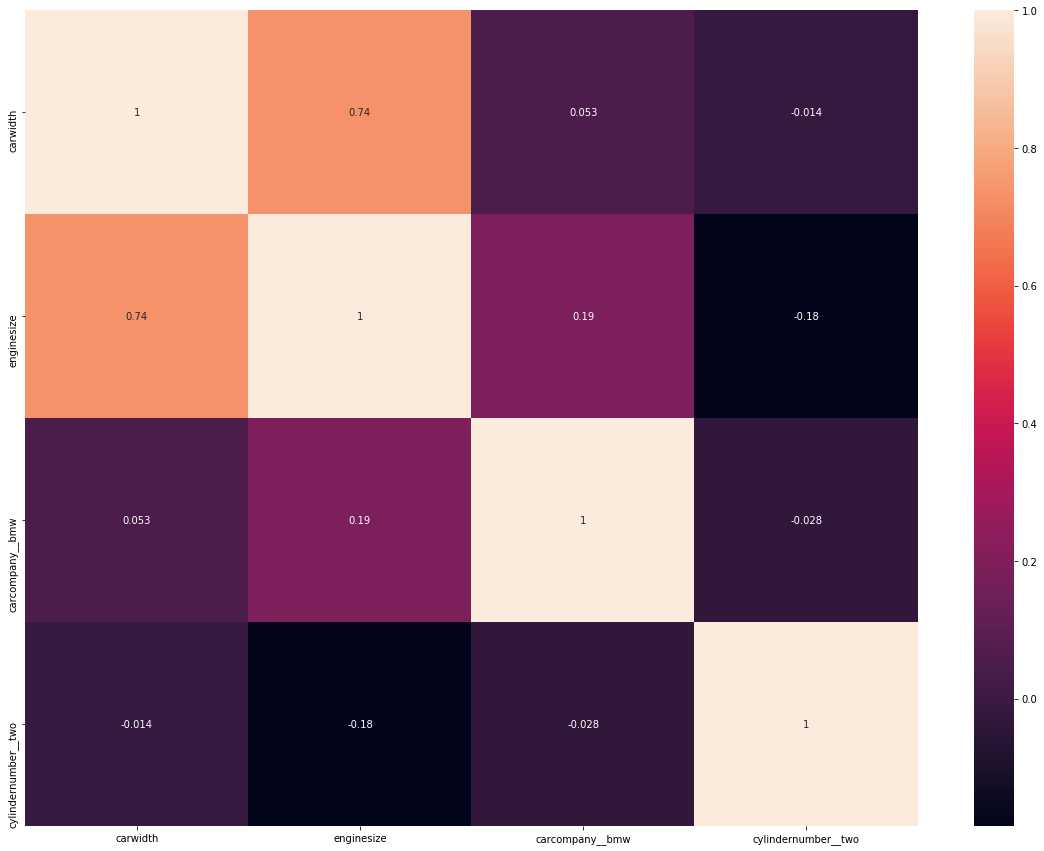

In [349]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,15))     # Size of the figure
car_corr = car[[
'carwidth',
'enginesize',
'carcompany__bmw',
'cylindernumber__two'
]]
sns.heatmap(car_corr.corr(),annot = True)

# We have arrived at the 4 variables that have low p-value (0.000) and acceptable VIF value( 1.06 to 2.46).The adjusted R squared value is 0.860.

# Variables: 'enginesize','carwidth','cylindernumber__two',
# 'carcompany__bmw'

# Model 28 seems ideal so lets proceed with predictions.

# Making Predictions Using the Model 28

In [350]:
# Adding  constant variable to test dataframe

X_test_rfe = X_test[col]
import statsmodels.api as sm  
X_test_rfe = sm.add_constant(X_test_rfe,has_constant='add')
# Dropping variables
X_test_rfe = X_test_rfe.drop(['fuelsystem__2bbl','fuelsystem__1bbl','fuelsystem__4bbl','fuelsystem__mpfi',
        'fuelsystem__spdi','fuelsystem__idi','compressionratio','fueltype','wheelbase',
        'carlength','carcompany__peugeot','carcompany__subaru','enginetype__rotor','carbody__convertible',
        'enginetype__ohcf','curbweight','cylindernumber__six','cylindernumber__eight','carcompany__volvo',
        'carcompany__porsche','carcompany__saab','boreratio','stroke',
        'cylindernumber__twelve','cylindernumber__three','enginelocation'], axis=1)



In [351]:
# Making predictions
y_pred_m28 = lm_28.predict(X_test_rfe)

# Evaluating Model 28

Text(0,0.5,'Car Price')

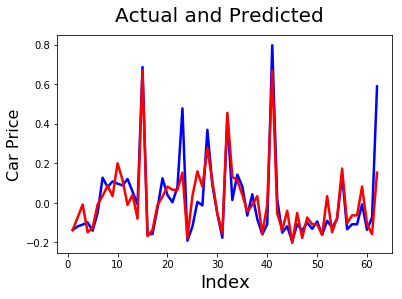

In [352]:
# Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred_m28, color="red",  linewidth=2.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)                       # Y-label

Text(0,0.5,'y_pred')

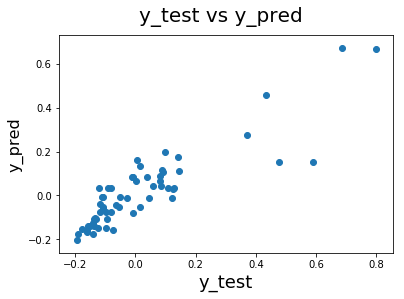

In [353]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_m28)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0,0.5,'ytest-ypred')

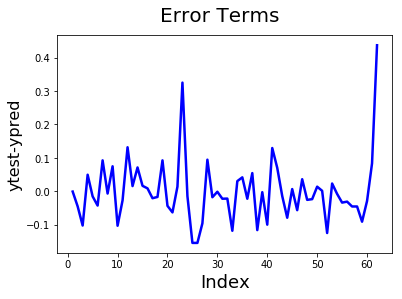

In [354]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,63,1)]
plt.plot(c,y_test-y_pred_m28, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

Text(0,0.5,'Index')

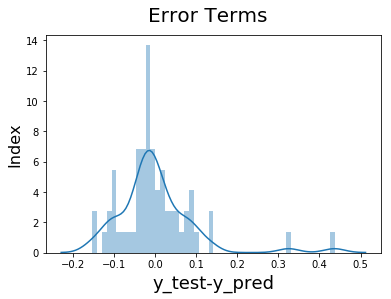

In [355]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred_m28),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)

In [356]:
# Now let's check the Root Mean Square Error of our model.
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_m28)))

RMSE : 0.09500087433430236


# Conclusions:

# The Prediction and Evaluation of Model 28 concludes the following:

The independent variables that influence the car price from hightes to lower order are :
1. Enginesize
2. Carwidth
3. CarCompany-BMW
4. Cylinder -Two

The test data is able to predict the as per the train data and the error distribution is a Gaussian distribution
RMSE = 0.09500087433430236

Adj. R-squared:0.860
